In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../src/")
import util as util

%autosave 5

Autosaving every 5 seconds


In [2]:
removalColumns = ["Date","Name","Close"]

## S&P

train MSE = 0.6178331172652046
test MSE = 3.1895055463427253
    columns  featureImportanceScores
19      DE1                 0.106601
6    EMA_50                 0.072619
7   EMA_200                 0.067626
8      DGS5                 0.064978
5    EMA_20                 0.062207
3    ROC_20                 0.061729
0     ROC_5                 0.055233
1    ROC_10                 0.052147
4    EMA_10                 0.050678
2    ROC_15                 0.050487
Spearman correlation for Next 10 day return vs DE1 is r=0.057041339056178746,p=0.011251496541645315


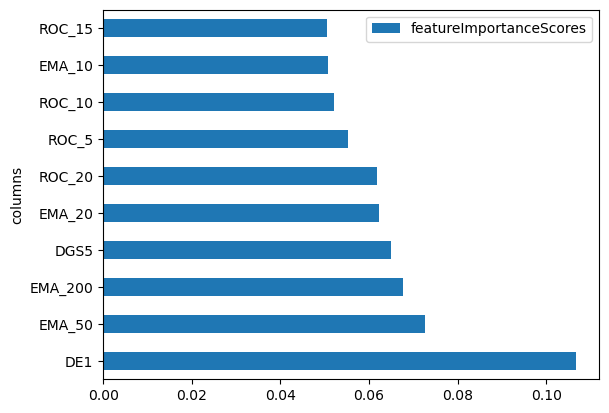

<Figure size 640x480 with 0 Axes>

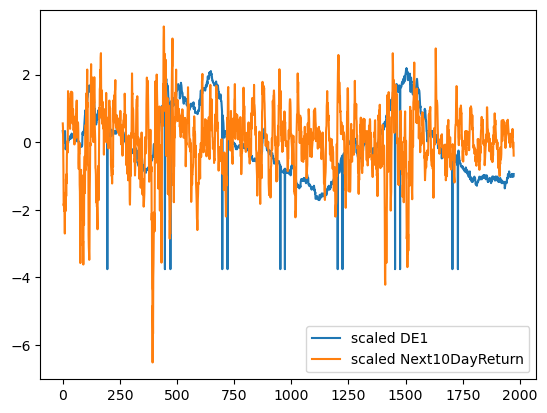

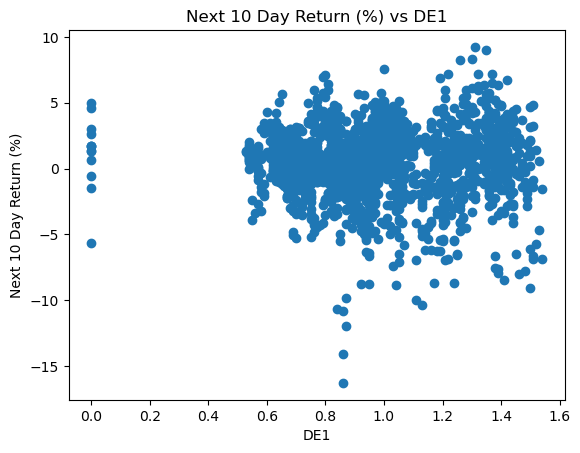

Spearman correlation for Next 10 day return vs EMA_50 is r=-0.09467017445393598,p=2.5203467796748955e-05


<Figure size 640x480 with 0 Axes>

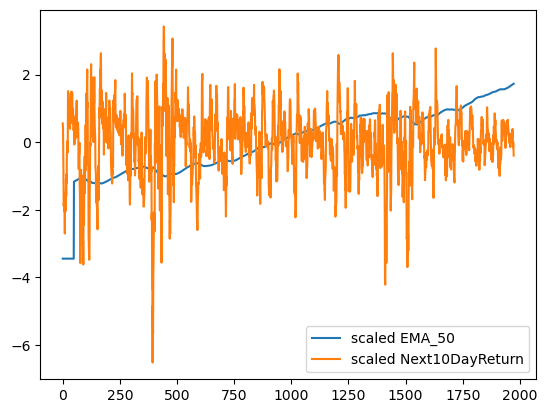

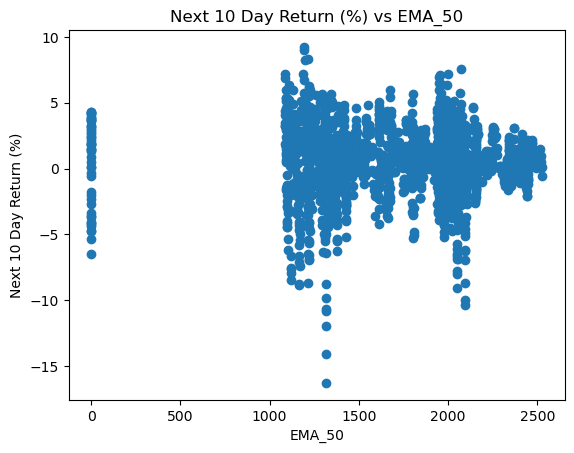

Spearman correlation for Next 10 day return vs EMA_200 is r=-0.07208402714553308,p=0.0013514971865901165


<Figure size 640x480 with 0 Axes>

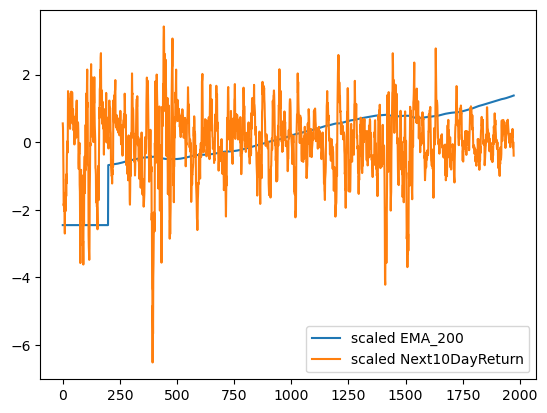

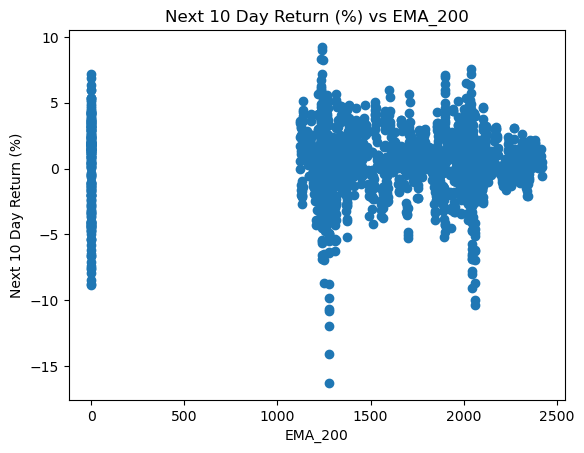

Spearman correlation for Next 10 day return vs DGS5 is r=-0.1149013117879975,p=3.075500913627224e-07


<Figure size 640x480 with 0 Axes>

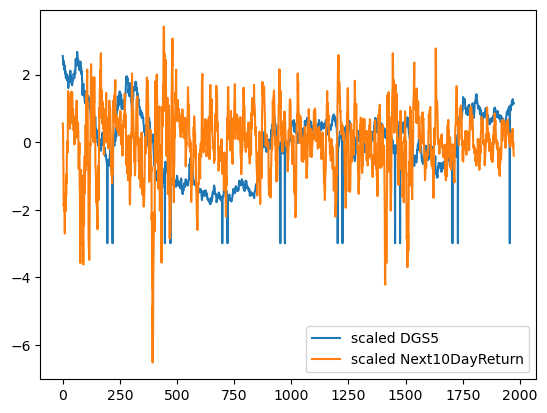

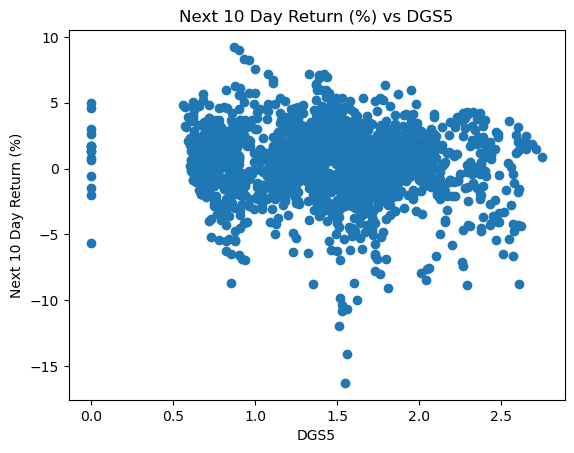

Spearman correlation for Next 10 day return vs EMA_20 is r=-0.10250621739725915,p=5.0316714149729684e-06


<Figure size 640x480 with 0 Axes>

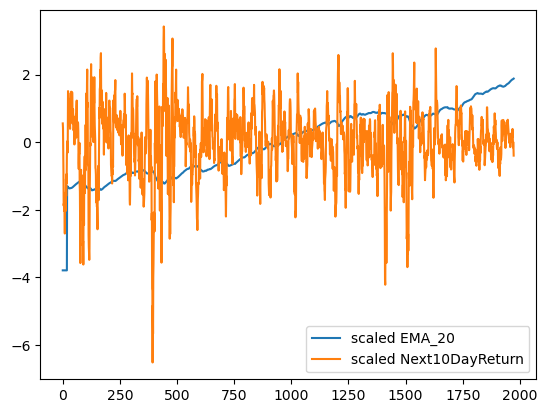

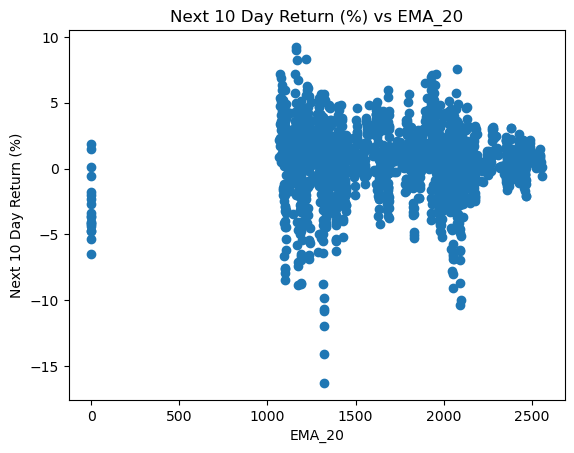

Spearman correlation for Next 10 day return vs ROC_20 is r=-0.09159602064395017,p=4.5900289010145125e-05


<Figure size 640x480 with 0 Axes>

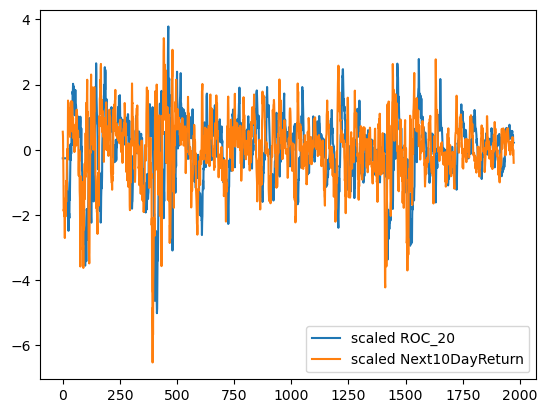

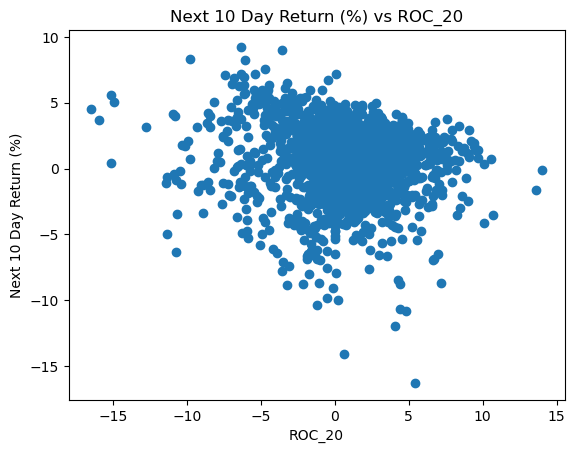

Spearman correlation for Next 10 day return vs ROC_5 is r=-0.06772126425775488,p=0.0026091479119852256


<Figure size 640x480 with 0 Axes>

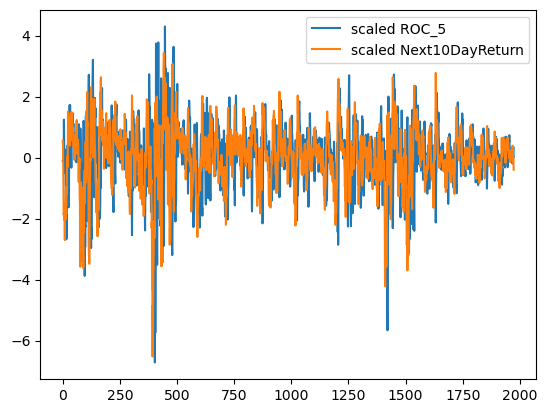

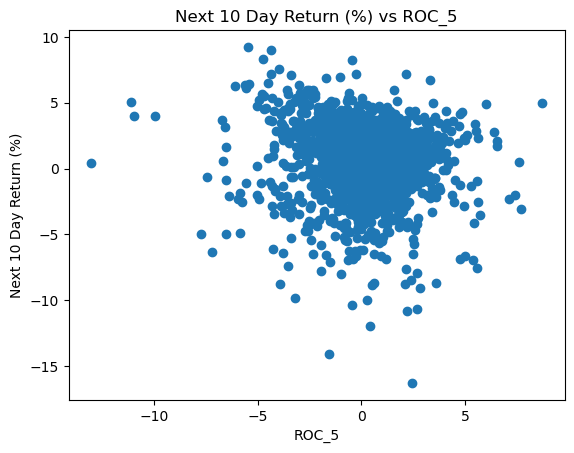

Spearman correlation for Next 10 day return vs ROC_10 is r=-0.06606316857758383,p=0.003319205212749922


<Figure size 640x480 with 0 Axes>

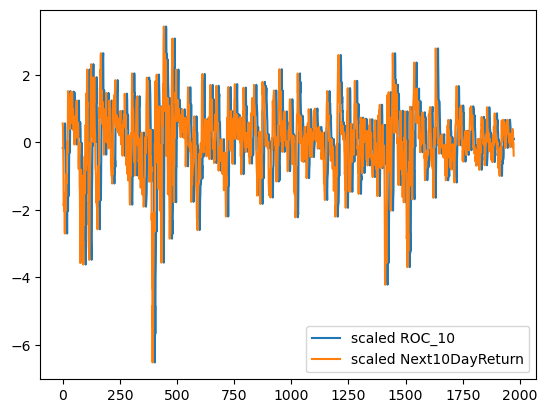

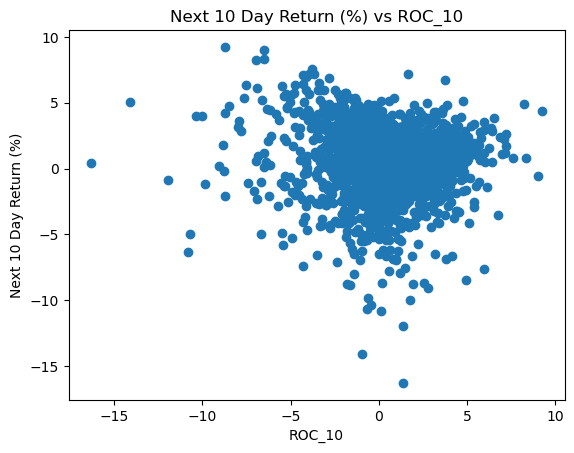

Spearman correlation for Next 10 day return vs EMA_10 is r=-0.1096861678921219,p=1.0343712008847443e-06


<Figure size 640x480 with 0 Axes>

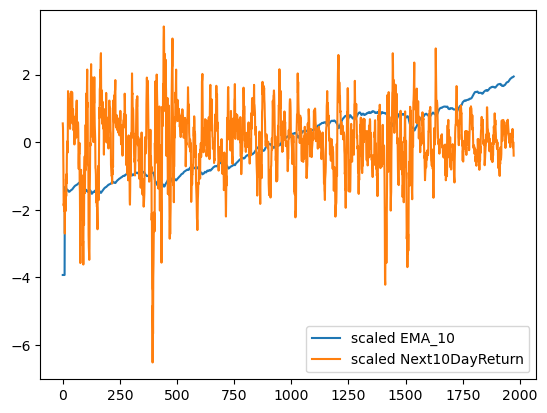

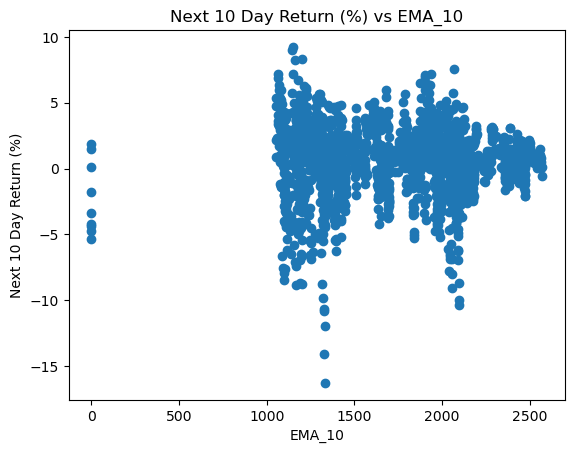

Spearman correlation for Next 10 day return vs ROC_15 is r=-0.0827356455124312,p=0.00023332227750079144


<Figure size 640x480 with 0 Axes>

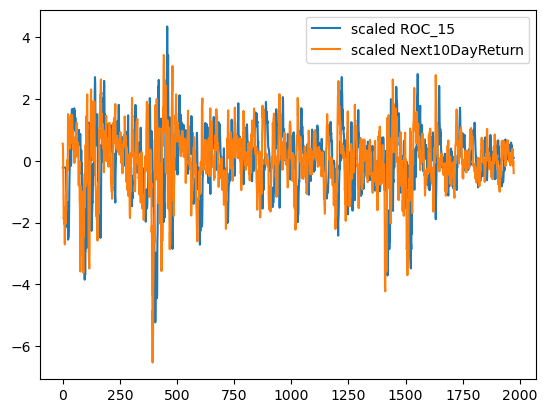

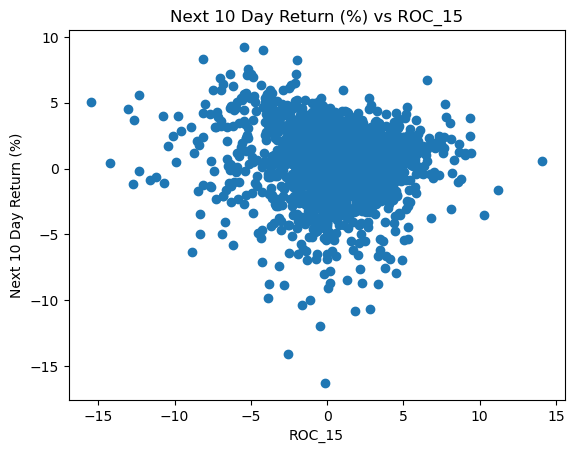

In [3]:
data = util.loadData("S&P").fillna(0)
dataWithDates = data.copy()
data = data.drop(removalColumns,axis=1)
allData = data.copy()

y = data["Next10DayReturn"]
X = data.drop("Next10DayReturn",axis=1)
XTrain,XTest,yTrain,yTest = train_test_split(X,y,test_size=0.2,random_state=42)

significantColumns = util.retriveLowPValueColumns(X,y)
XTrain,XTest = XTrain[significantColumns],XTest[significantColumns]

modelGridSearch = util.getBestModel(XTrain,yTrain)

util.printMSE(modelGridSearch,XTrain,XTest,yTrain,yTest)

importanceDF = util.createImportanceDF(modelGridSearch.best_estimator_.feature_importances_,XTrain.columns)

print(importanceDF.head(10))
importanceDF.head(10).plot.barh(x="columns", y="featureImportanceScores", rot=0)
util.displayScatterOfTop10Features(data,importanceDF)

## NASDAQ

train MSE = 0.6909945262685405
test MSE = 3.569865140938063
   columns  featureImportanceScores
5   EMA_20                 0.125271
14     DE2                 0.105174
6   EMA_50                 0.094457
3   ROC_20                 0.093890
7     DGS5                 0.079016
4   EMA_10                 0.078222
1   ROC_10                 0.076580
2   ROC_15                 0.065253
13     TE6                 0.050515
8    DGS10                 0.048136
Spearman correlation for Next 10 day return vs EMA_20 is r=-0.07218804805366974,p=0.0013298873647717173


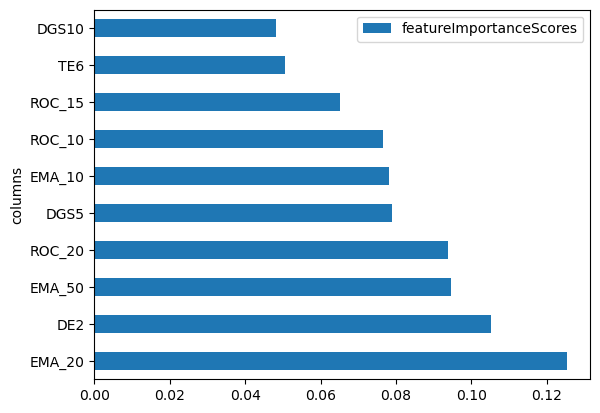

<Figure size 640x480 with 0 Axes>

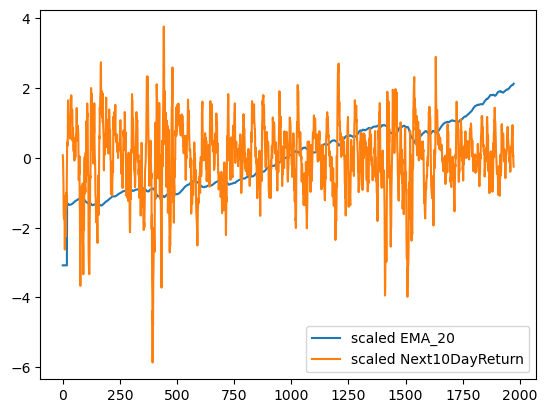

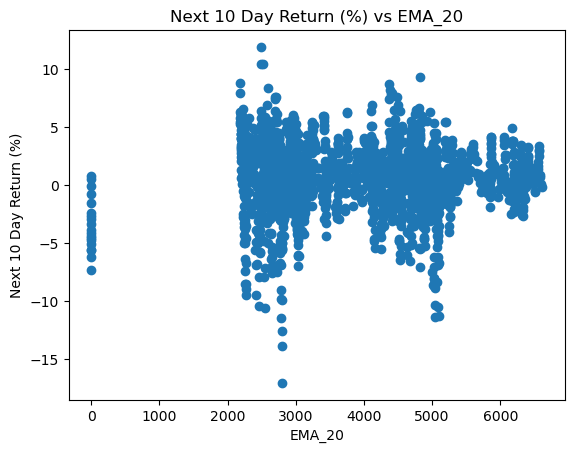

Spearman correlation for Next 10 day return vs DE2 is r=0.05380388084064702,p=0.01681587980380621


<Figure size 640x480 with 0 Axes>

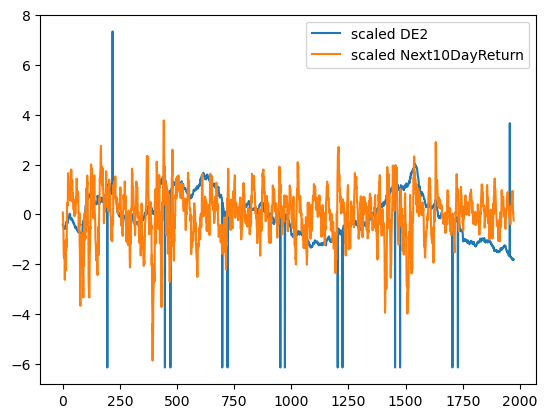

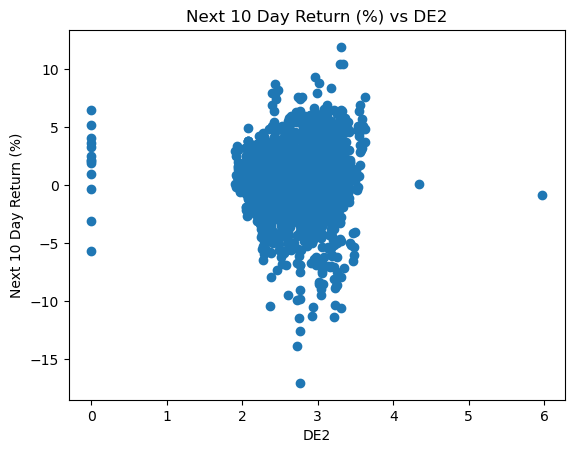

Spearman correlation for Next 10 day return vs EMA_50 is r=-0.06418876763304505,p=0.00433052219271488


<Figure size 640x480 with 0 Axes>

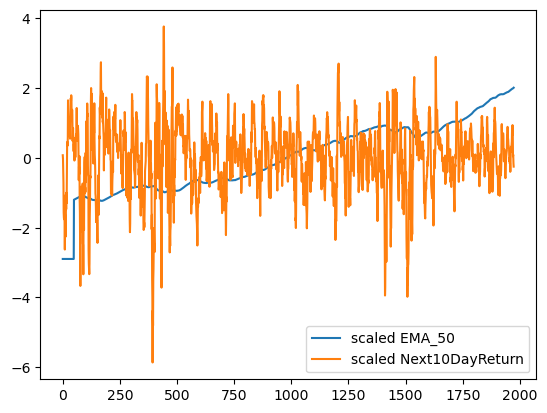

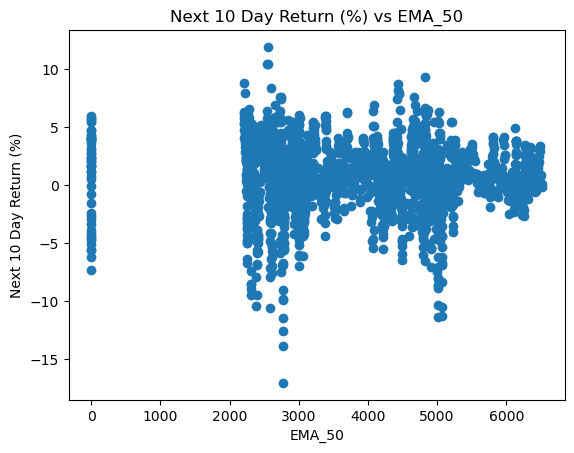

Spearman correlation for Next 10 day return vs ROC_20 is r=-0.09253262901598516,p=3.831194821095727e-05


<Figure size 640x480 with 0 Axes>

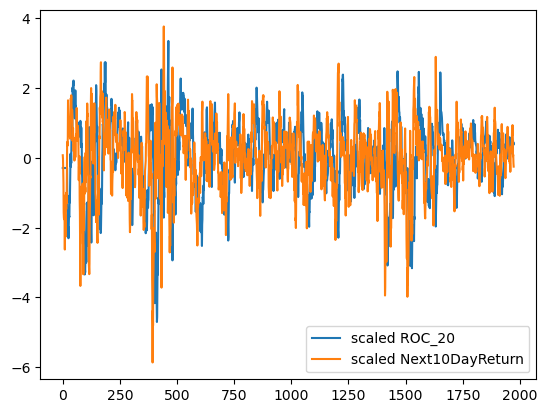

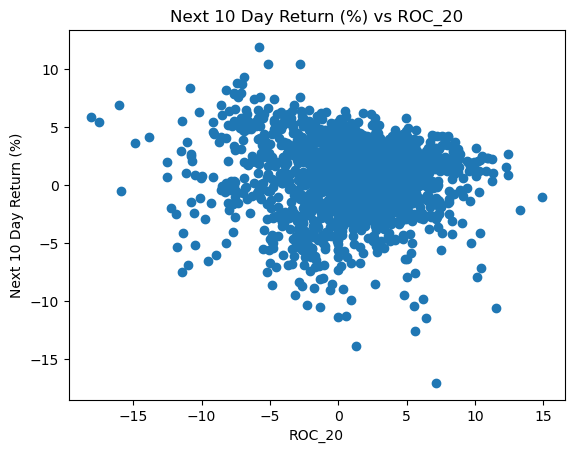

Spearman correlation for Next 10 day return vs DGS5 is r=-0.0905062401681503,p=5.652032413527724e-05


<Figure size 640x480 with 0 Axes>

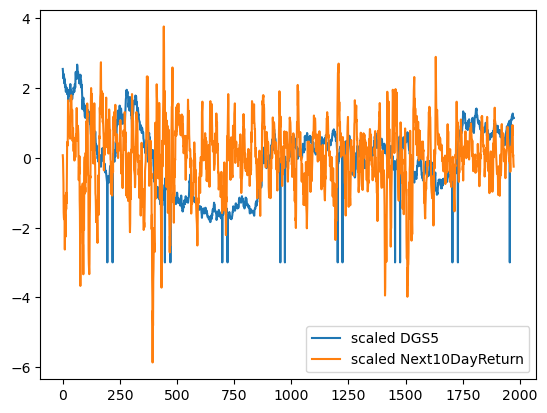

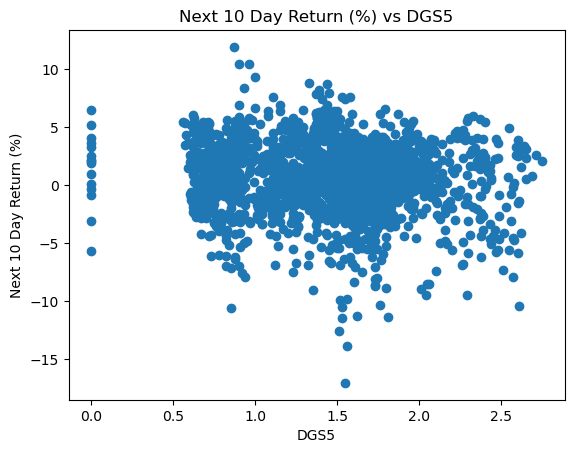

Spearman correlation for Next 10 day return vs EMA_10 is r=-0.07587212061559641,p=0.0007416367718667487


<Figure size 640x480 with 0 Axes>

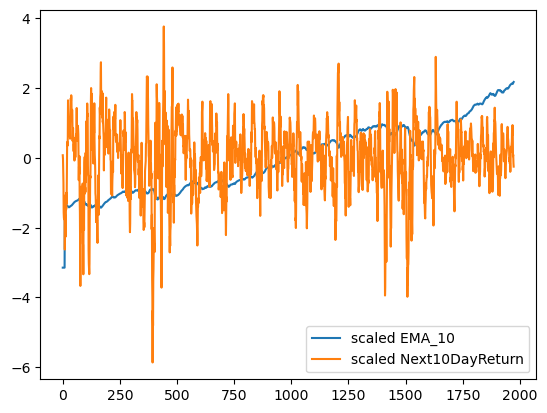

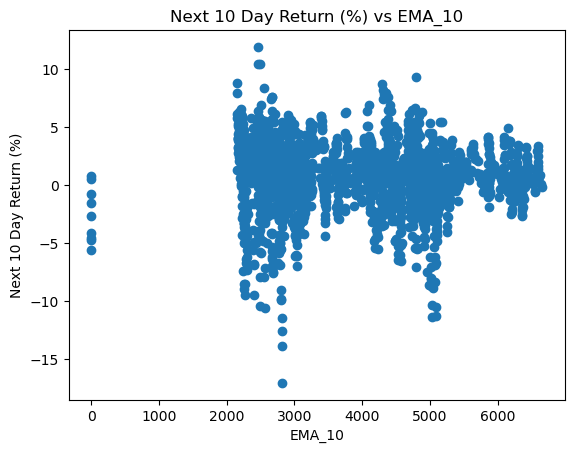

Spearman correlation for Next 10 day return vs ROC_10 is r=-0.05907636972297551,p=0.008655305390102832


<Figure size 640x480 with 0 Axes>

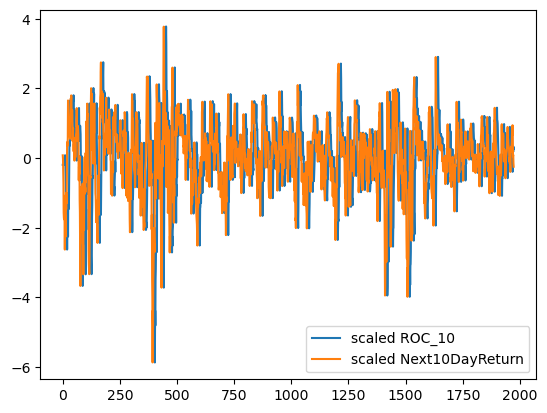

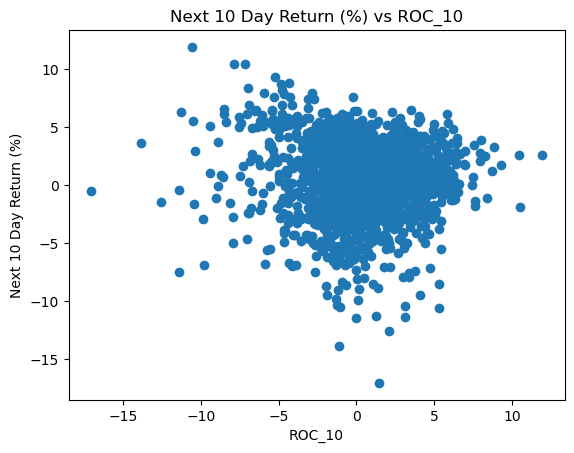

Spearman correlation for Next 10 day return vs ROC_15 is r=-0.08207003541665156,p=0.00026203837464309663


<Figure size 640x480 with 0 Axes>

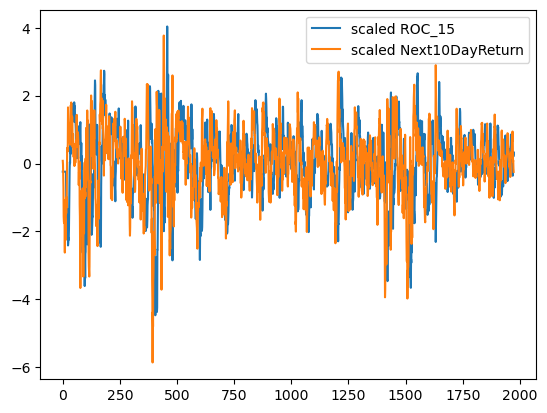

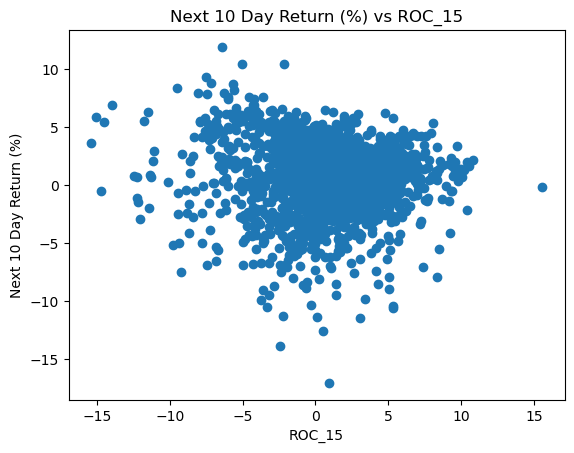

Spearman correlation for Next 10 day return vs TE6 is r=-0.07185095257361314,p=0.0014010974652665497


<Figure size 640x480 with 0 Axes>

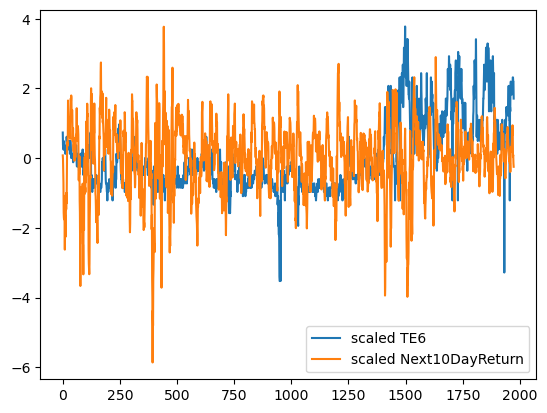

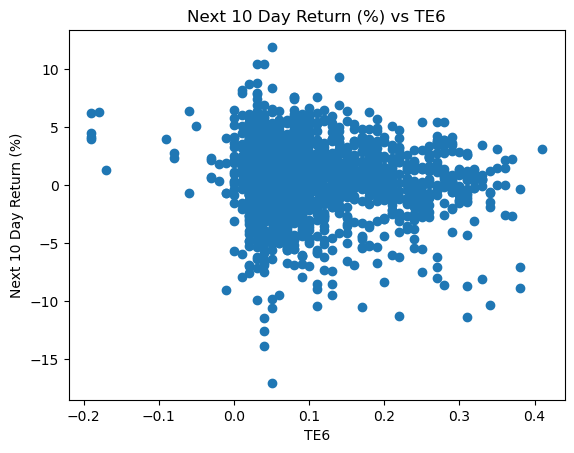

Spearman correlation for Next 10 day return vs DGS10 is r=-0.05713299632892926,p=0.011121144202800743


<Figure size 640x480 with 0 Axes>

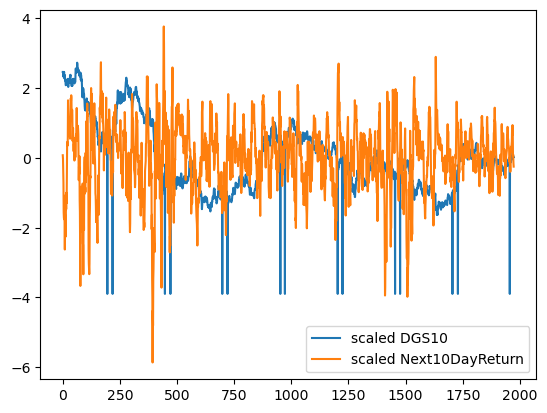

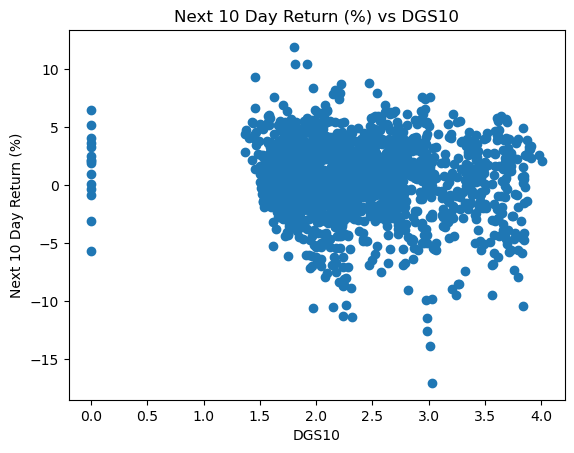

In [4]:
data = util.loadData("NASDAQ").fillna(0)
dataWithDates = data.copy()
data = data.drop(removalColumns,axis=1)
allData = pd.concat([allData,data.copy()])

y = data["Next10DayReturn"]
X = data.drop("Next10DayReturn",axis=1)
XTrain,XTest,yTrain,yTest = train_test_split(X,y,test_size=0.2,random_state=42)

significantColumns = util.retriveLowPValueColumns(X,y)
XTrain,XTest = XTrain[significantColumns],XTest[significantColumns]

modelGridSearch = util.getBestModel(XTrain,yTrain)

util.printMSE(modelGridSearch,XTrain,XTest,yTrain,yTest)

importanceDF = util.createImportanceDF(modelGridSearch.best_estimator_.feature_importances_,XTrain.columns)

print(importanceDF.head(10))
importanceDF.head(10).plot.barh(x="columns", y="featureImportanceScores", rot=0)
util.displayScatterOfTop10Features(data,importanceDF)

## NYSE

train MSE = 0.6508586399754269
test MSE = 3.5677290943753976
    columns  featureImportanceScores
23      DE1                 0.089404
4    EMA_10                 0.079233
9      DGS5                 0.057947
3    ROC_20                 0.055796
2    ROC_15                 0.055602
22      TE6                 0.054112
1    ROC_10                 0.052255
5    EMA_20                 0.051999
7   EMA_200                 0.049760
24      DE2                 0.048795
Spearman correlation for Next 10 day return vs DE1 is r=0.06619412159812339,p=0.0032573074107666174


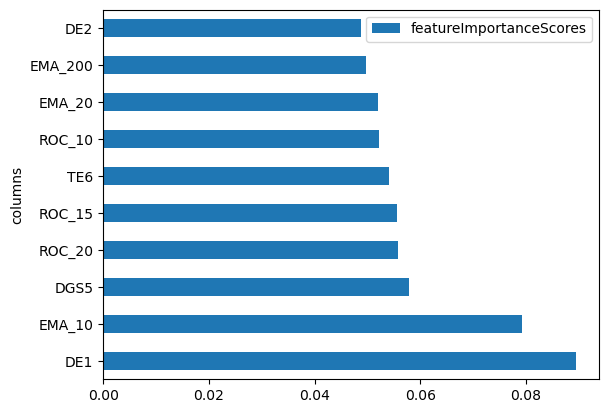

<Figure size 640x480 with 0 Axes>

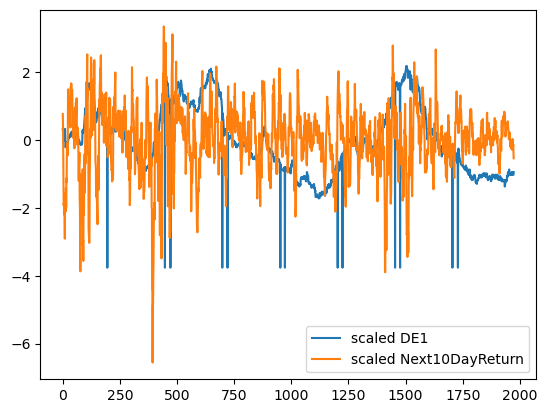

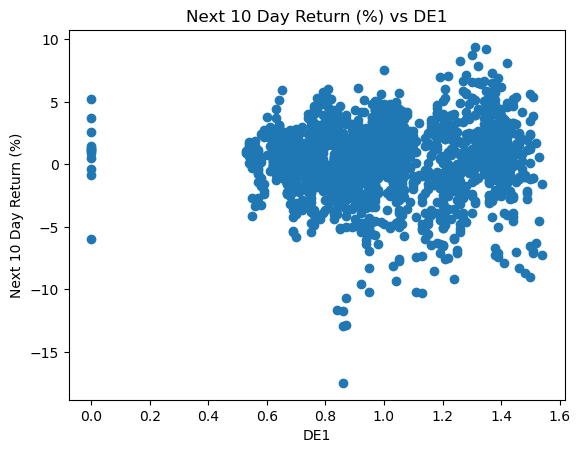

Spearman correlation for Next 10 day return vs EMA_10 is r=-0.12903930485848789,p=8.735335782219774e-09


<Figure size 640x480 with 0 Axes>

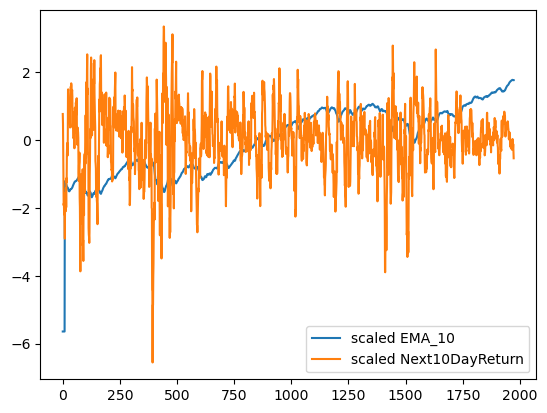

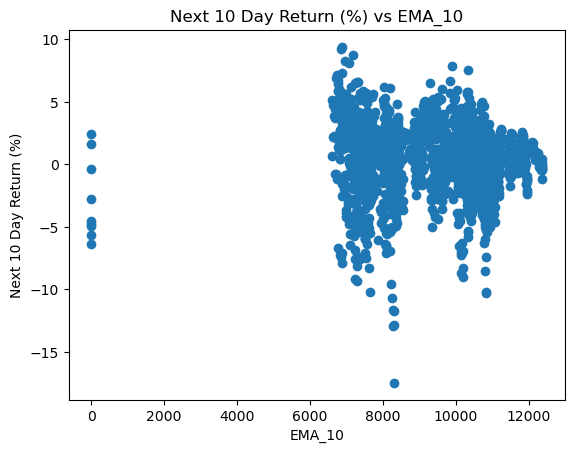

Spearman correlation for Next 10 day return vs DGS5 is r=-0.11015579296056437,p=9.293954644515199e-07


<Figure size 640x480 with 0 Axes>

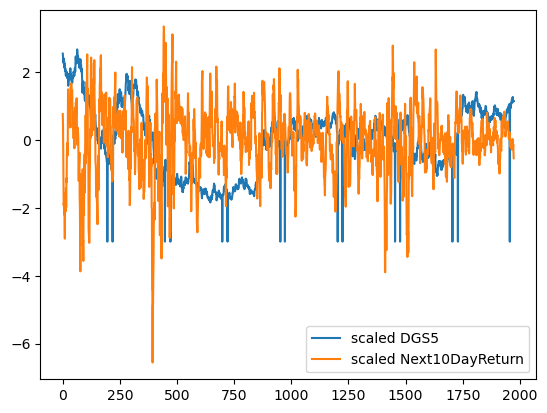

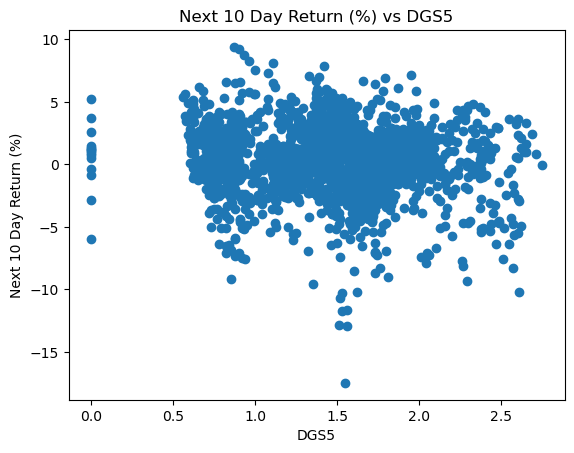

Spearman correlation for Next 10 day return vs ROC_20 is r=-0.09326370159390832,p=3.323251763669217e-05


<Figure size 640x480 with 0 Axes>

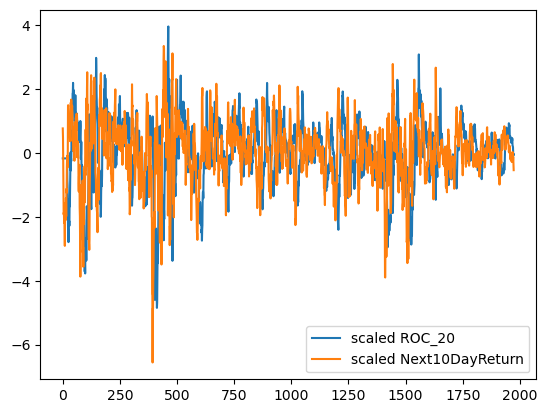

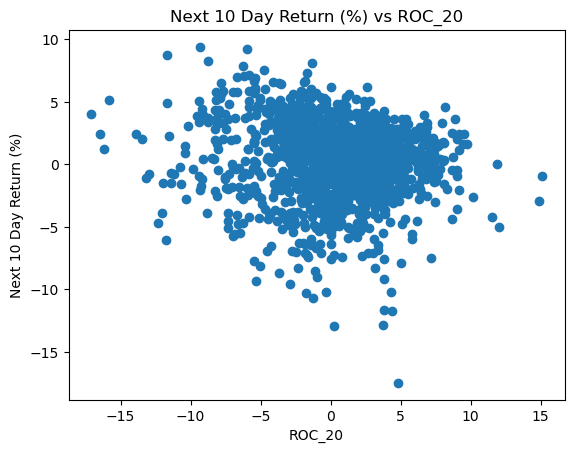

Spearman correlation for Next 10 day return vs ROC_15 is r=-0.0879874766868762,p=9.063818215156573e-05


<Figure size 640x480 with 0 Axes>

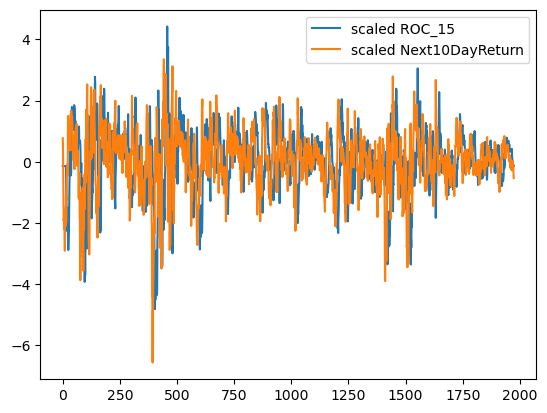

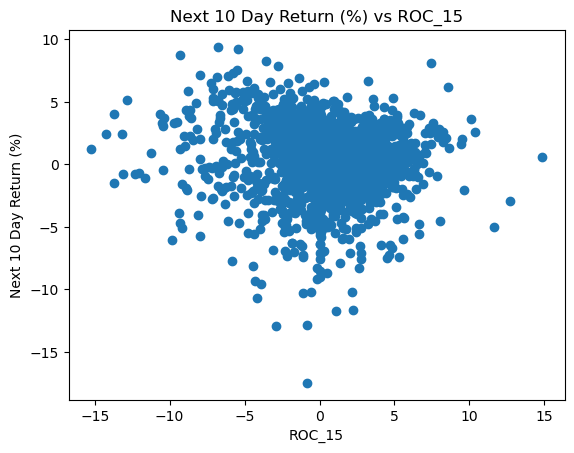

Spearman correlation for Next 10 day return vs TE6 is r=-0.07670735594879266,p=0.0006473601875923539


<Figure size 640x480 with 0 Axes>

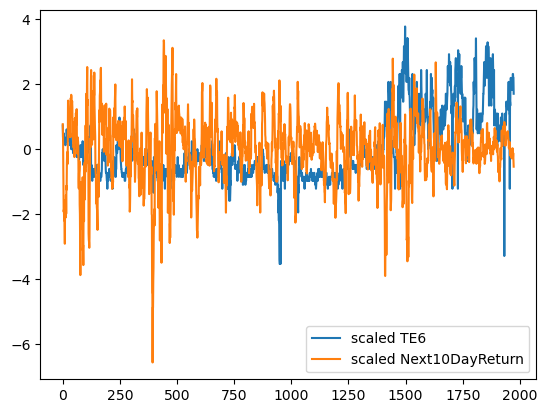

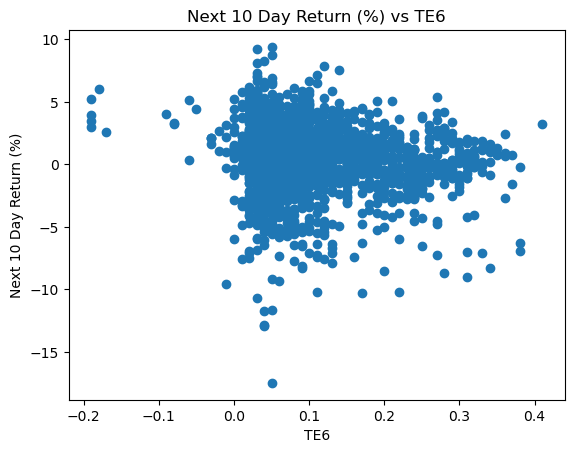

Spearman correlation for Next 10 day return vs ROC_10 is r=-0.07522268426526112,p=0.0008235814058176243


<Figure size 640x480 with 0 Axes>

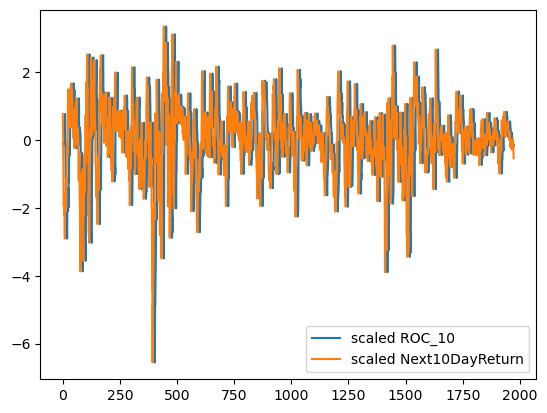

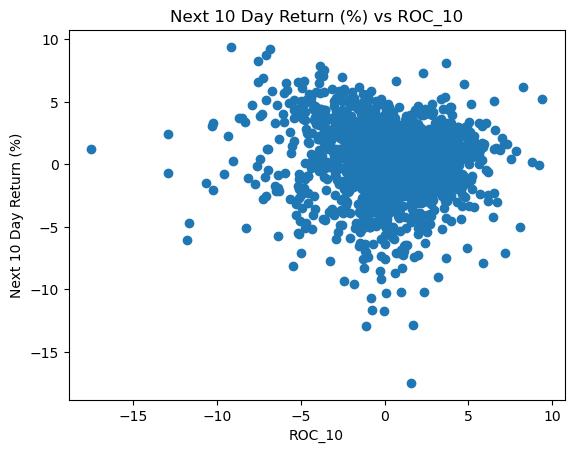

Spearman correlation for Next 10 day return vs EMA_20 is r=-0.12031241082698414,p=8.251253002554123e-08


<Figure size 640x480 with 0 Axes>

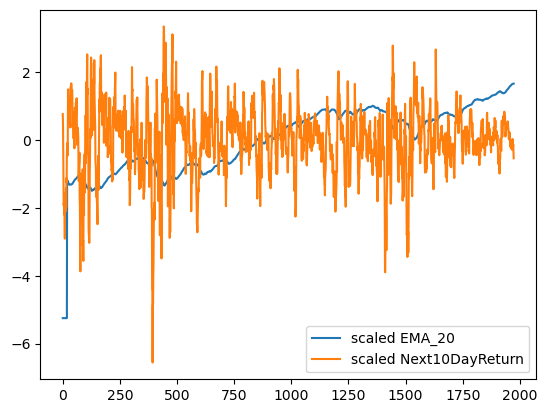

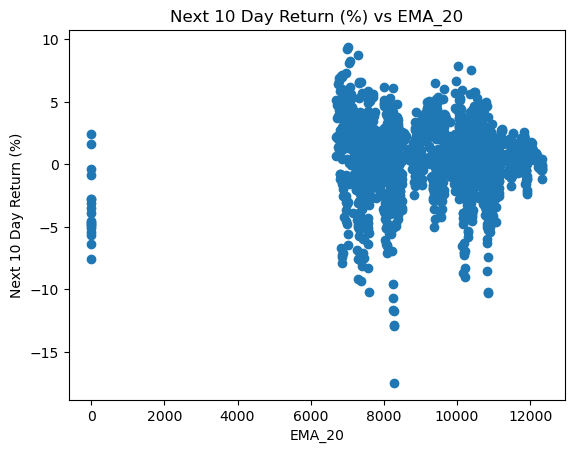

Spearman correlation for Next 10 day return vs EMA_200 is r=-0.09740400848230606,p=1.4562550681876647e-05


<Figure size 640x480 with 0 Axes>

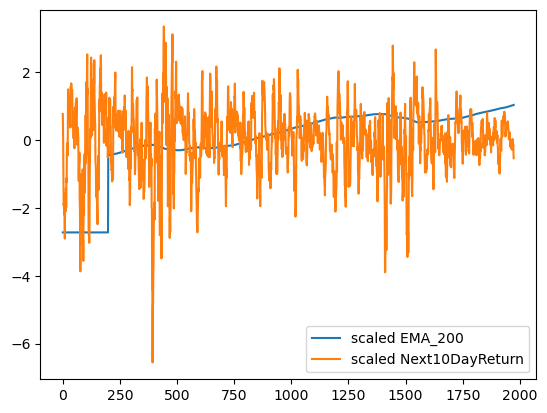

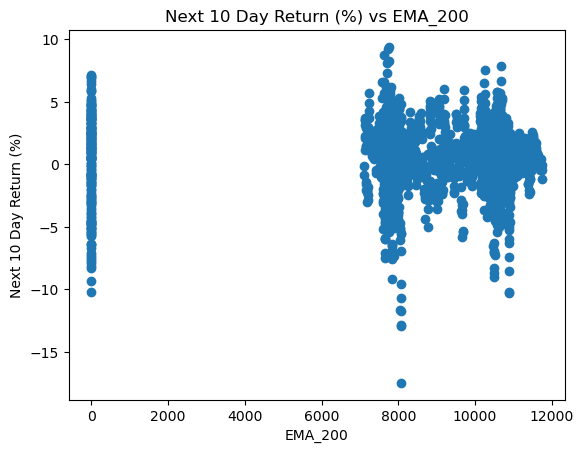

Spearman correlation for Next 10 day return vs DE2 is r=0.08673859468643251,p=0.00011403637886716514


<Figure size 640x480 with 0 Axes>

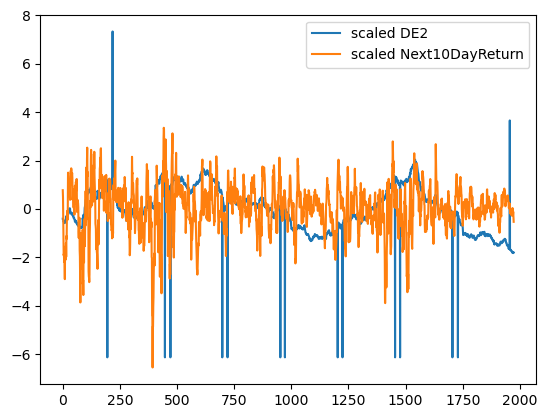

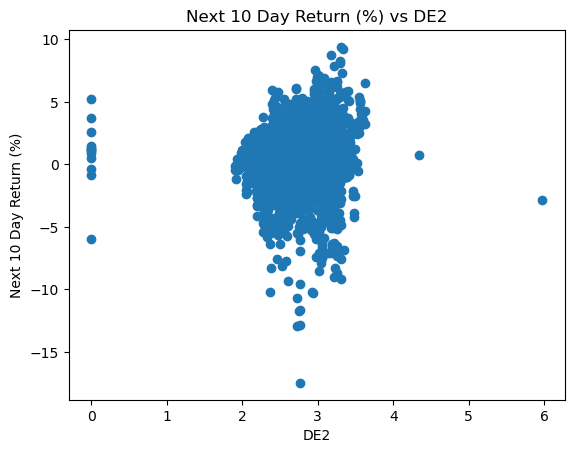

In [5]:
data = util.loadData("NYSE").fillna(0)
dataWithDates = data.copy()
data = data.drop(removalColumns,axis=1)
allData = pd.concat([allData,data.copy()])

y = data["Next10DayReturn"]
X = data.drop("Next10DayReturn",axis=1)
XTrain,XTest,yTrain,yTest = train_test_split(X,y,test_size=0.2,random_state=42)

significantColumns = util.retriveLowPValueColumns(X,y)
XTrain,XTest = XTrain[significantColumns],XTest[significantColumns]

modelGridSearch = util.getBestModel(XTrain,yTrain)

util.printMSE(modelGridSearch,XTrain,XTest,yTrain,yTest)

importanceDF = util.createImportanceDF(modelGridSearch.best_estimator_.feature_importances_,XTrain.columns)

print(importanceDF.head(10))
importanceDF.head(10).plot.barh(x="columns", y="featureImportanceScores", rot=0)
util.displayScatterOfTop10Features(data,importanceDF)

## RUSSELL

train MSE = 0.9990245185438922
test MSE = 4.902506803726902
    columns  featureImportanceScores
16      DE1                 0.099328
2    EMA_10                 0.081298
6      DGS5                 0.078301
1    ROC_20                 0.077420
5   EMA_200                 0.075898
17      DE2                 0.068955
0    ROC_15                 0.064007
3    EMA_20                 0.062704
4    EMA_50                 0.056987
8      DAAA                 0.054907
Spearman correlation for Next 10 day return vs DE1 is r=0.04699577089085674,p=0.03681227481650832


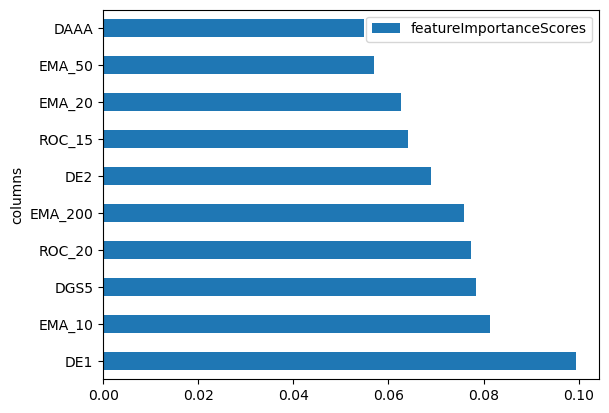

<Figure size 640x480 with 0 Axes>

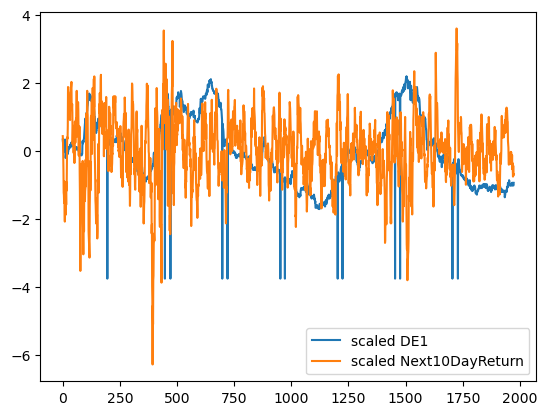

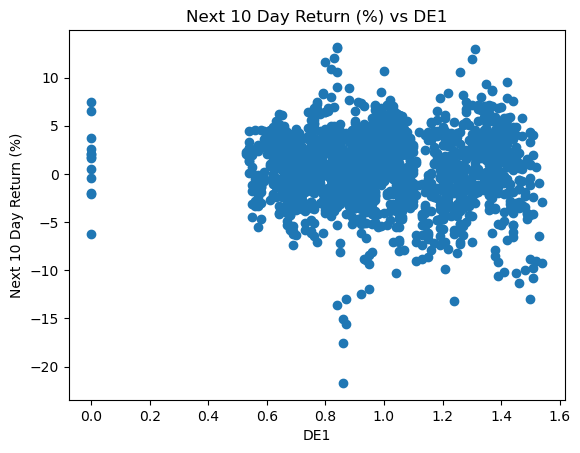

Spearman correlation for Next 10 day return vs EMA_10 is r=-0.14843472555782056,p=3.4146474718346294e-11


<Figure size 640x480 with 0 Axes>

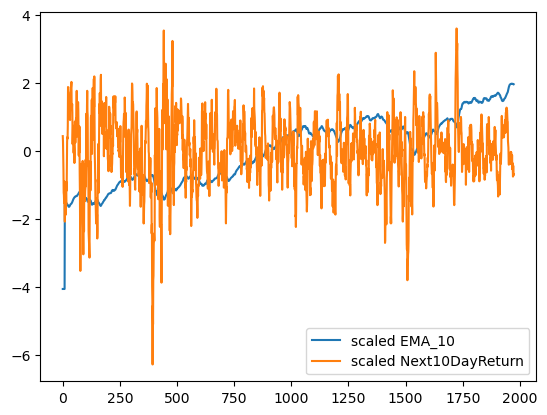

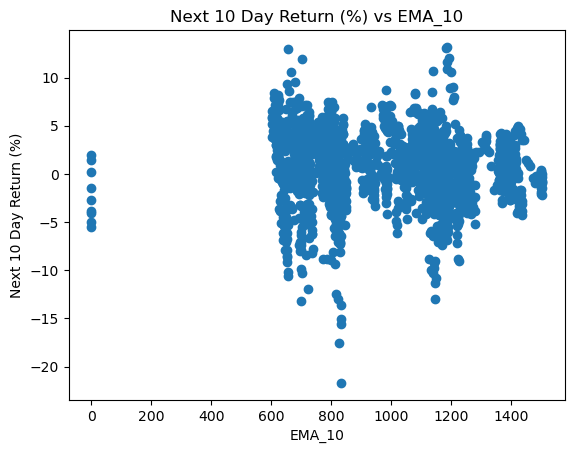

Spearman correlation for Next 10 day return vs DGS5 is r=-0.1254068904733678,p=2.2661754629518065e-08


<Figure size 640x480 with 0 Axes>

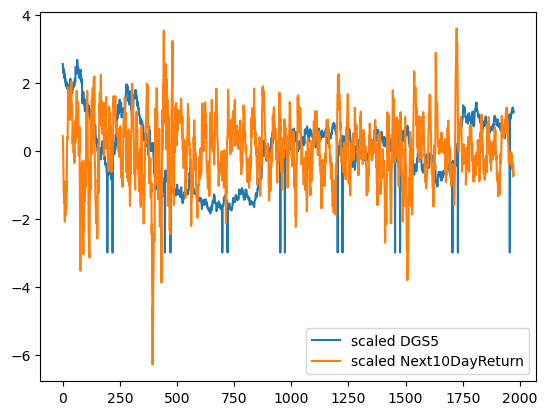

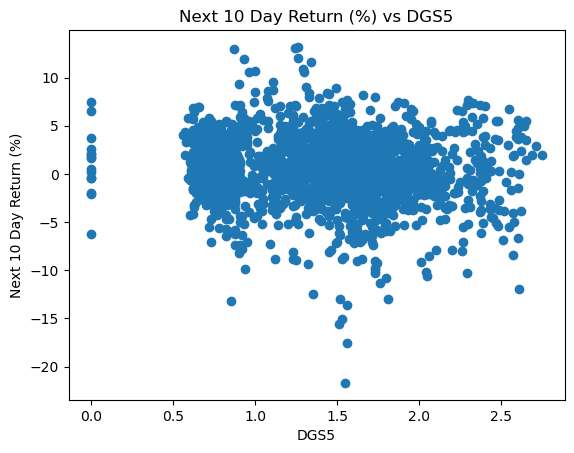

Spearman correlation for Next 10 day return vs ROC_20 is r=-0.10233250731759208,p=5.2214242855268295e-06


<Figure size 640x480 with 0 Axes>

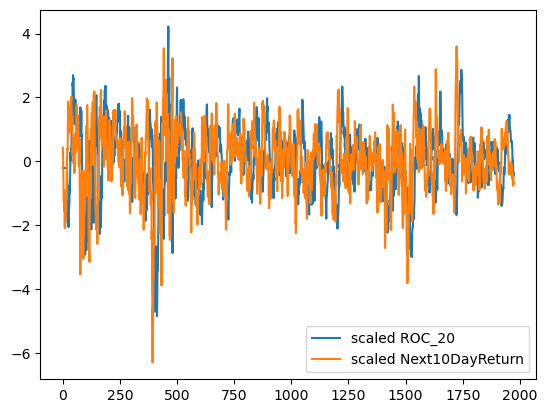

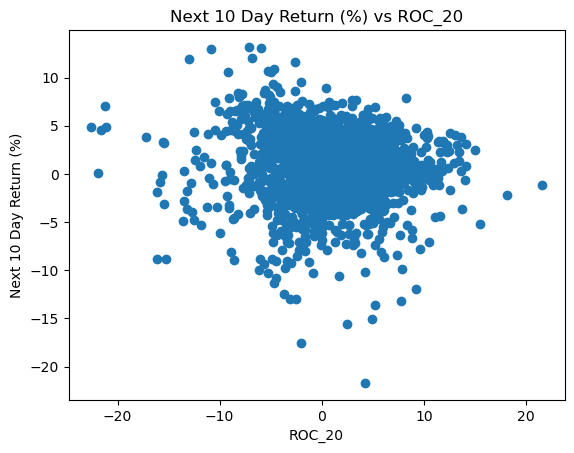

Spearman correlation for Next 10 day return vs EMA_200 is r=-0.0985406572524957,p=1.1543355733642373e-05


<Figure size 640x480 with 0 Axes>

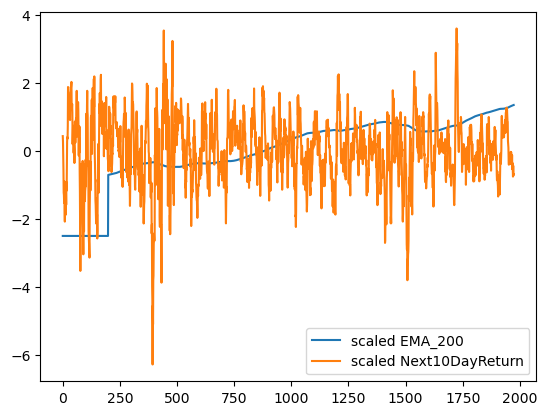

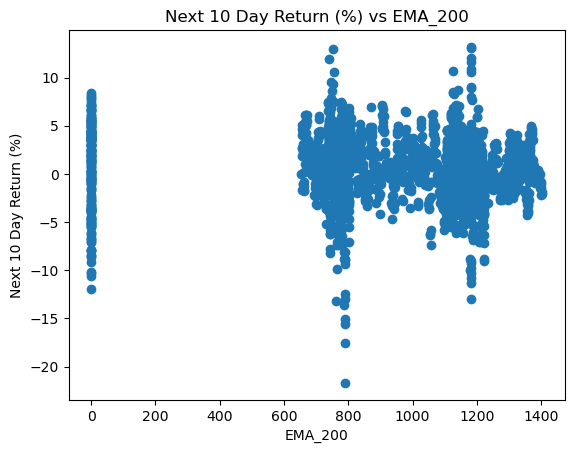

Spearman correlation for Next 10 day return vs DE2 is r=0.09144198944941069,p=4.7277186395452114e-05


<Figure size 640x480 with 0 Axes>

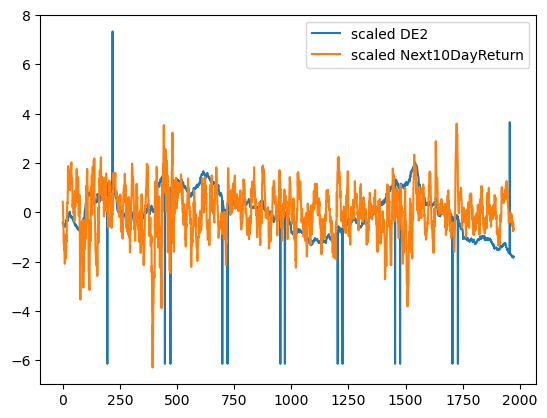

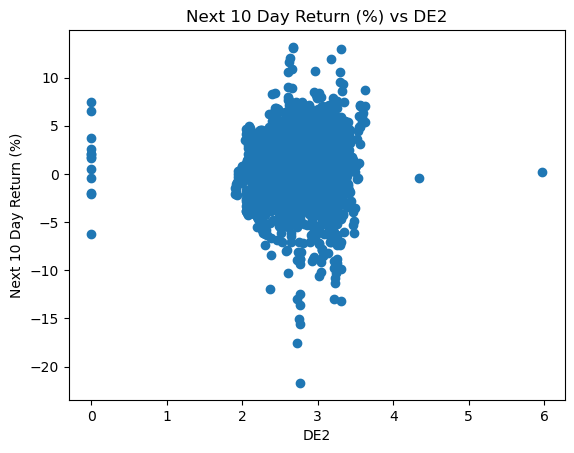

Spearman correlation for Next 10 day return vs ROC_15 is r=-0.08042964501576412,p=0.00034756132710763696


<Figure size 640x480 with 0 Axes>

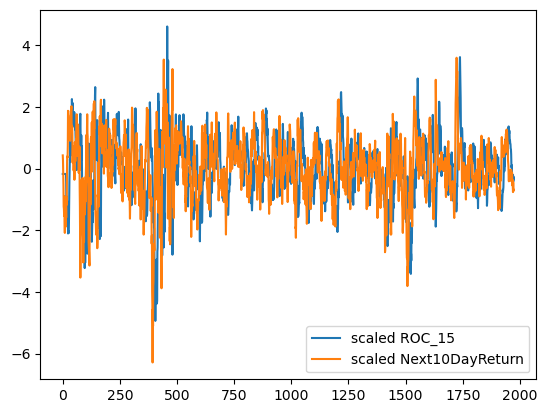

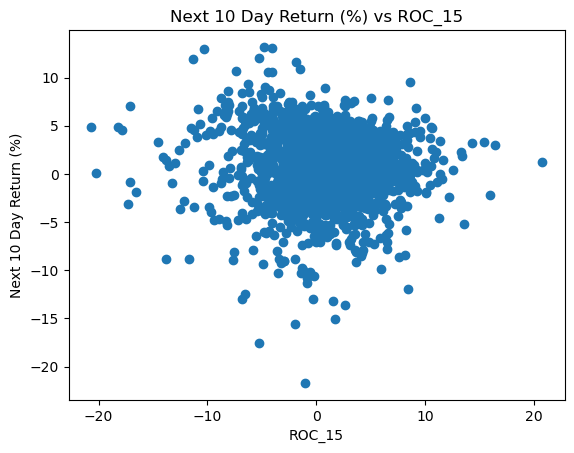

Spearman correlation for Next 10 day return vs EMA_20 is r=-0.14254237777240908,p=1.9964239057040823e-10


<Figure size 640x480 with 0 Axes>

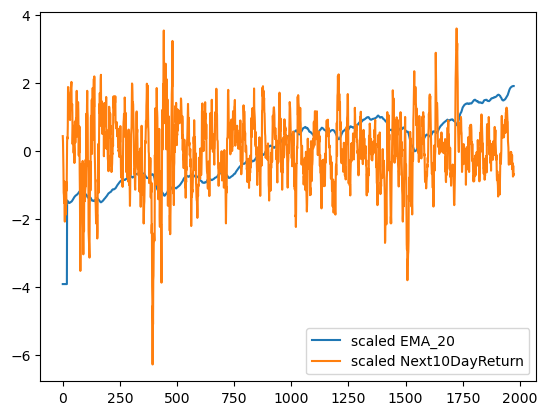

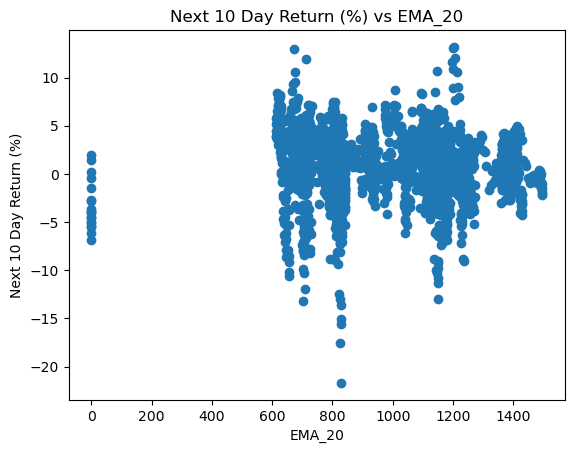

Spearman correlation for Next 10 day return vs EMA_50 is r=-0.13061267982615032,p=5.732663145168619e-09


<Figure size 640x480 with 0 Axes>

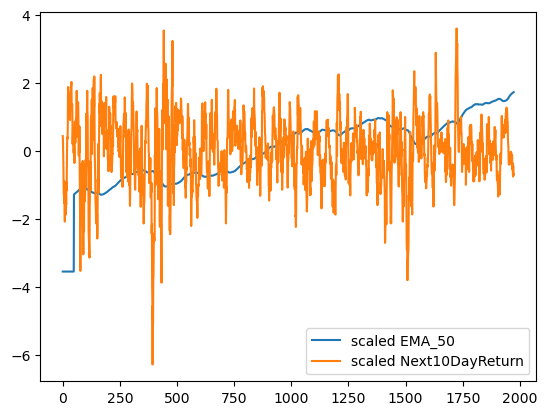

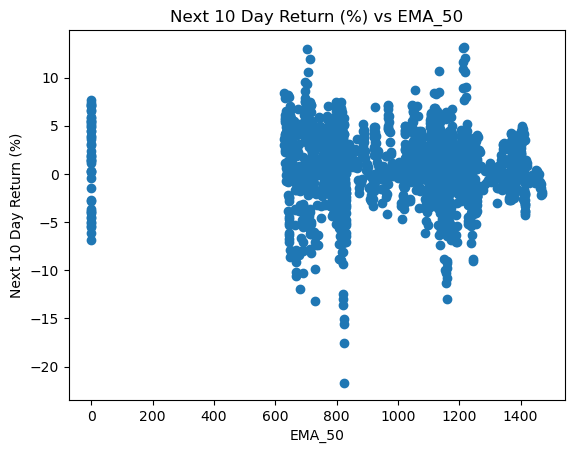

Spearman correlation for Next 10 day return vs DAAA is r=-0.047244699159403436,p=0.03582472957141552


<Figure size 640x480 with 0 Axes>

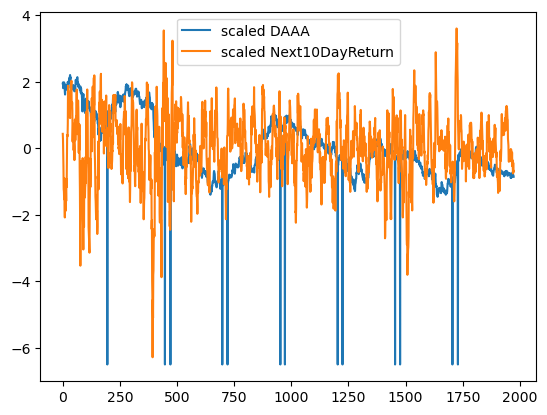

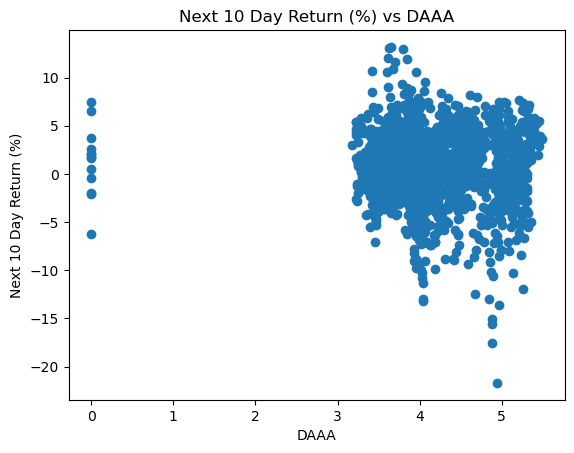

In [6]:
data = util.loadData("RUSSELL").fillna(0)
dataWithDates = data.copy()
data = data.drop(removalColumns,axis=1)
allData = pd.concat([allData,data.copy()])

y = data["Next10DayReturn"]
X = data.drop("Next10DayReturn",axis=1)
XTrain,XTest,yTrain,yTest = train_test_split(X,y,test_size=0.2,random_state=42)

significantColumns = util.retriveLowPValueColumns(X,y)
XTrain,XTest = XTrain[significantColumns],XTest[significantColumns]

modelGridSearch = util.getBestModel(XTrain,yTrain)

util.printMSE(modelGridSearch,XTrain,XTest,yTrain,yTest)

importanceDF = util.createImportanceDF(modelGridSearch.best_estimator_.feature_importances_,XTrain.columns)

print(importanceDF.head(10))
importanceDF.head(10).plot.barh(x="columns", y="featureImportanceScores", rot=0)
util.displayScatterOfTop10Features(data,importanceDF)

## DJI

train MSE = 0.4875676312342887
test MSE = 2.6427191271653467
   columns  featureImportanceScores
1   ROC_20                 0.118622
4   EMA_50                 0.103709
14     DE2                 0.101175
2   EMA_10                 0.099732
0   ROC_15                 0.079433
7     DGS5                 0.078509
3   EMA_20                 0.075148
9     DAAA                 0.061512
13     TE6                 0.060385
6     DTB3                 0.048244
Spearman correlation for Next 10 day return vs ROC_20 is r=-0.09741734007192433,p=1.4523131899527646e-05


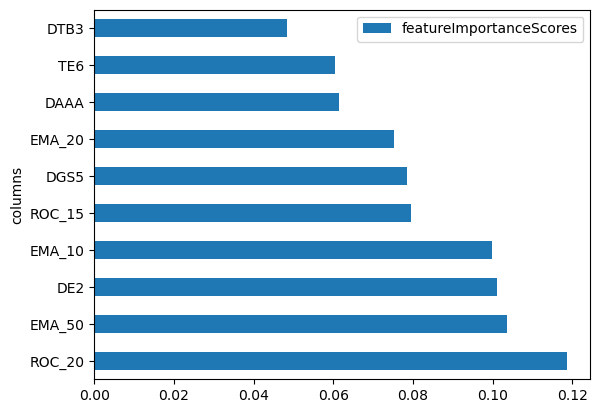

<Figure size 640x480 with 0 Axes>

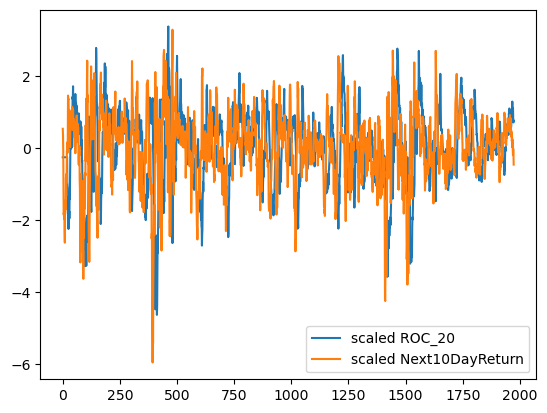

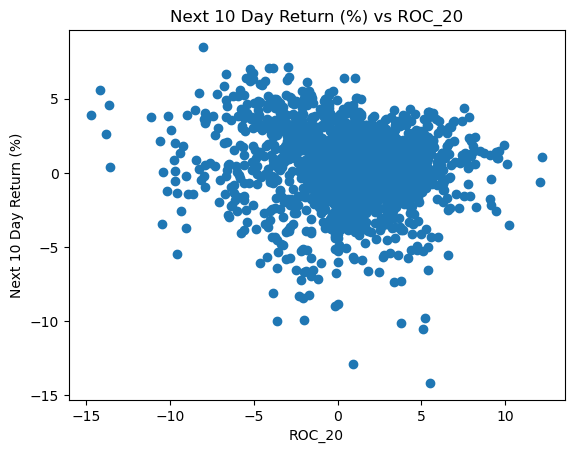

Spearman correlation for Next 10 day return vs EMA_50 is r=-0.06942071419248103,p=0.0020279188960326358


<Figure size 640x480 with 0 Axes>

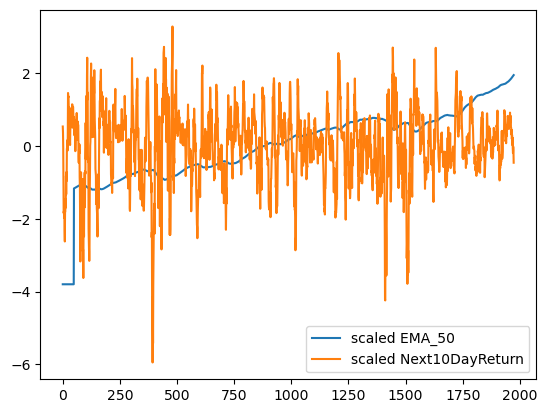

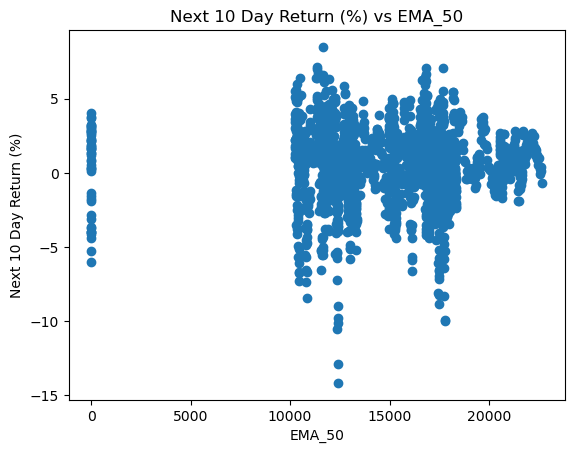

Spearman correlation for Next 10 day return vs DE2 is r=0.07163956607250561,p=0.0014475272051936133


<Figure size 640x480 with 0 Axes>

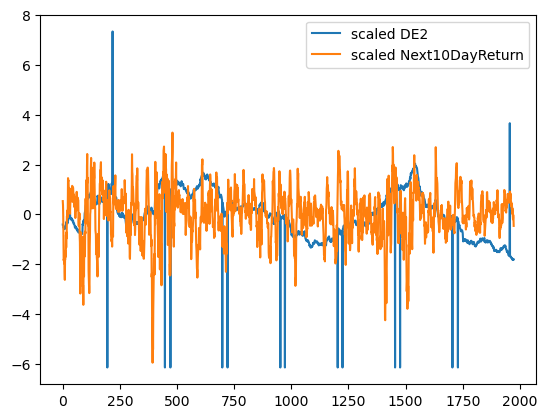

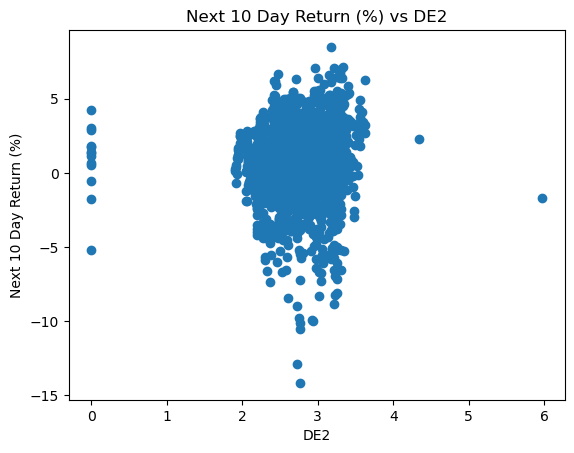

Spearman correlation for Next 10 day return vs EMA_10 is r=-0.08356200809245042,p=0.00020177263917916155


<Figure size 640x480 with 0 Axes>

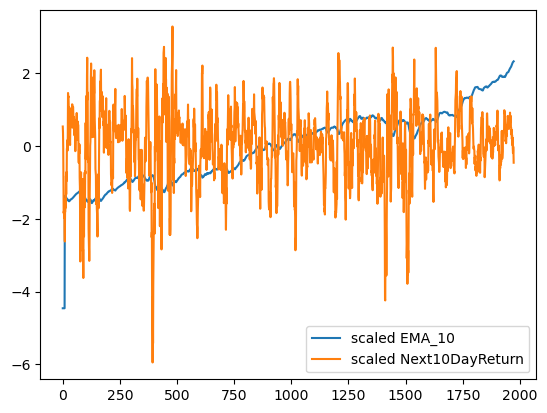

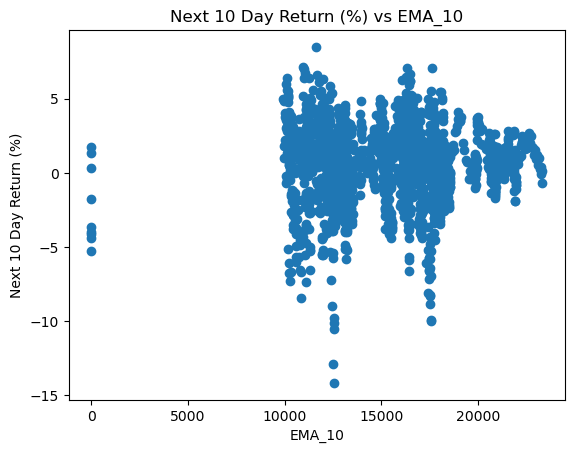

Spearman correlation for Next 10 day return vs ROC_15 is r=-0.0776288402034894,p=0.0005563383135589261


<Figure size 640x480 with 0 Axes>

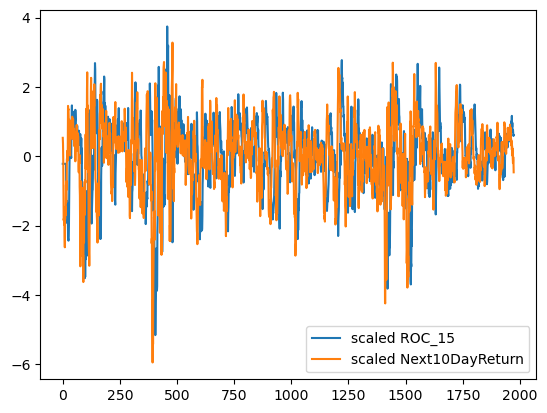

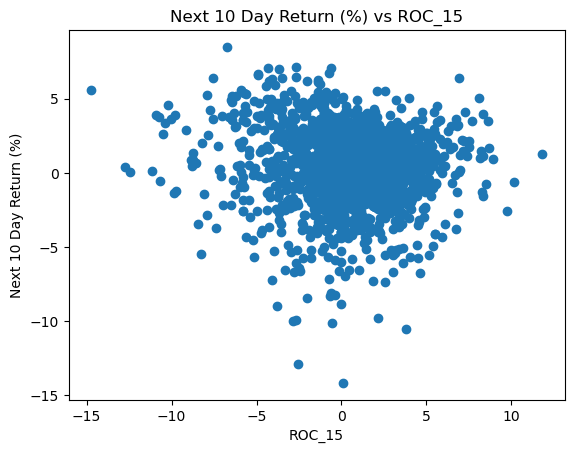

Spearman correlation for Next 10 day return vs DGS5 is r=-0.08370579389783575,p=0.0001967098783123268


<Figure size 640x480 with 0 Axes>

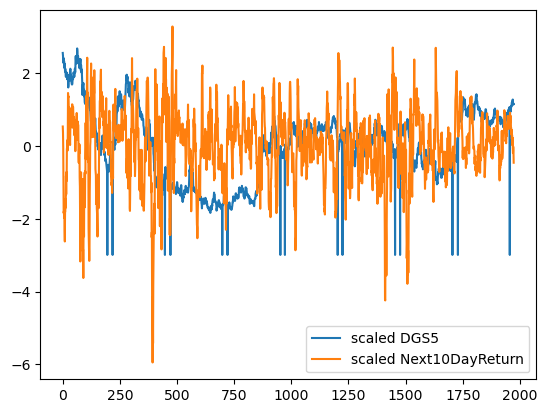

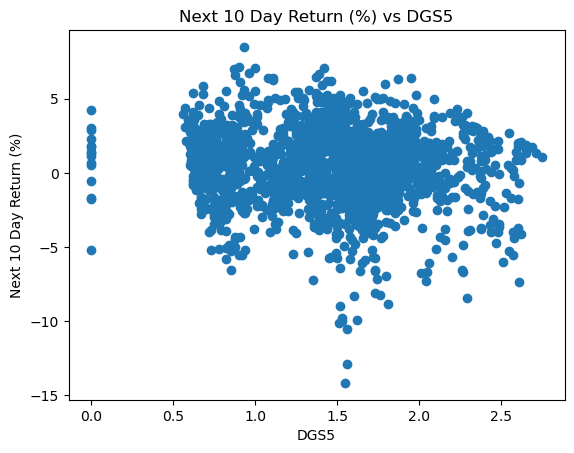

Spearman correlation for Next 10 day return vs EMA_20 is r=-0.07704250146726925,p=0.0006127630615062204


<Figure size 640x480 with 0 Axes>

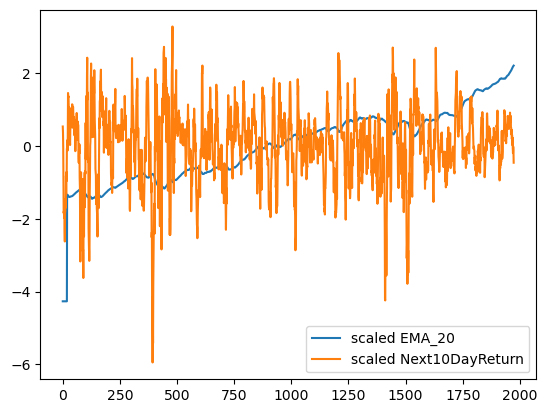

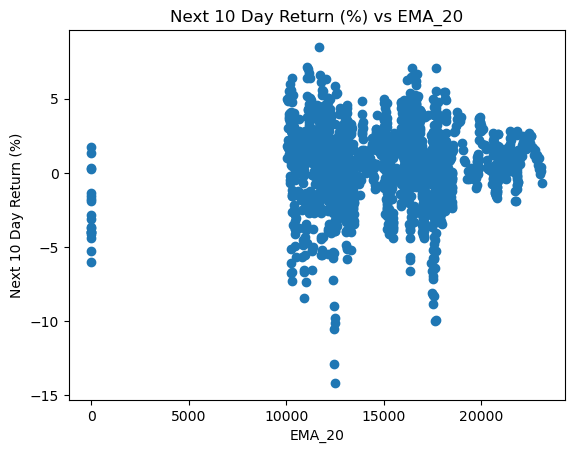

Spearman correlation for Next 10 day return vs DAAA is r=-0.052171879650616614,p=0.020444295905803978


<Figure size 640x480 with 0 Axes>

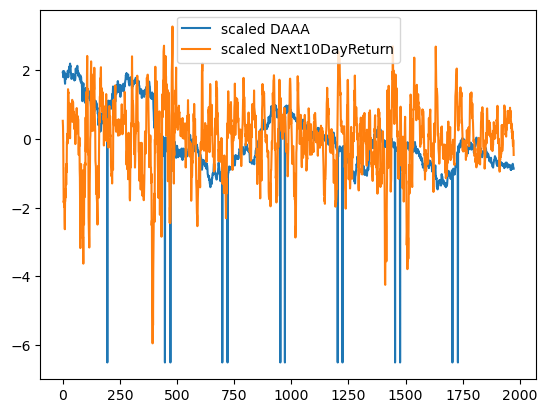

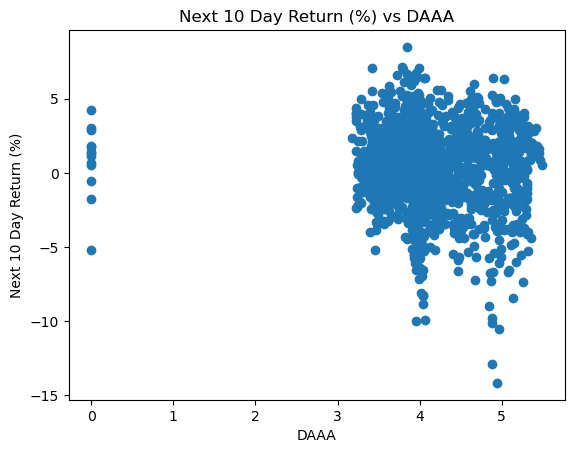

Spearman correlation for Next 10 day return vs TE6 is r=-0.04961884448984182,p=0.02748829484049224


<Figure size 640x480 with 0 Axes>

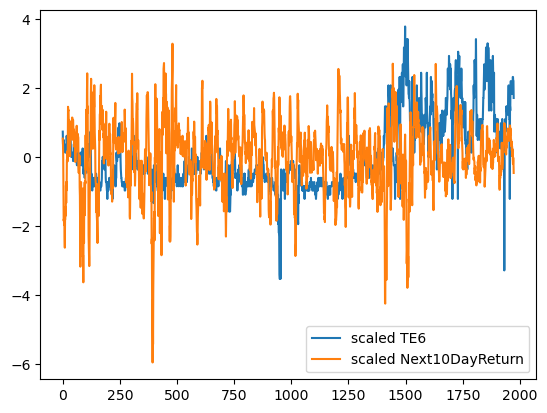

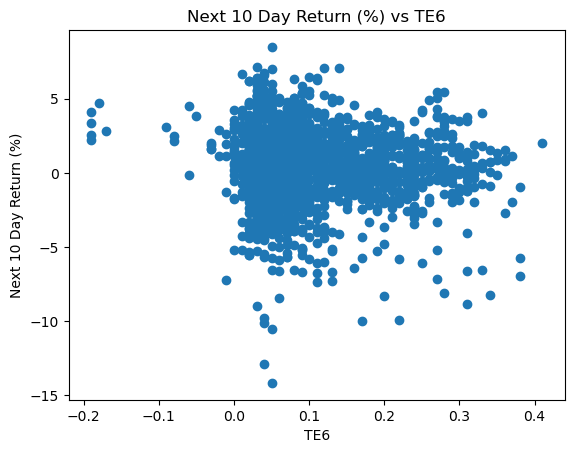

Spearman correlation for Next 10 day return vs DTB3 is r=0.049666829819544955,p=0.02733869880590859


<Figure size 640x480 with 0 Axes>

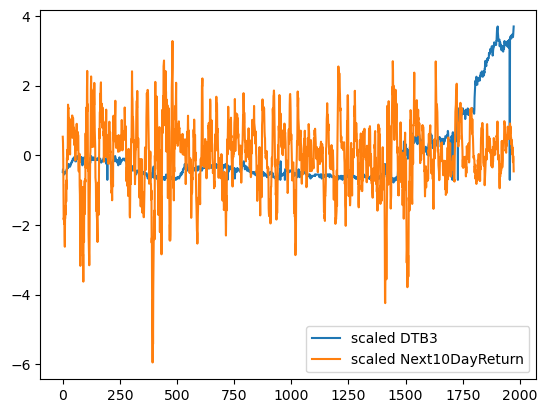

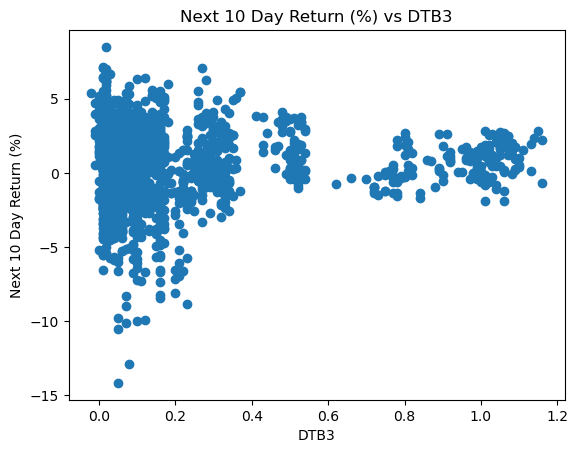

In [7]:
data = util.loadData("DJI").fillna(0)
dataWithDates = data.copy()
data = data.drop(removalColumns,axis=1)
allData = pd.concat([allData,data.copy()])

y = data["Next10DayReturn"]
X = data.drop("Next10DayReturn",axis=1)
XTrain,XTest,yTrain,yTest = train_test_split(X,y,test_size=0.2,random_state=42)

significantColumns = util.retriveLowPValueColumns(X,y)
XTrain,XTest = XTrain[significantColumns],XTest[significantColumns]

modelGridSearch = util.getBestModel(XTrain,yTrain)

util.printMSE(modelGridSearch,XTrain,XTest,yTrain,yTest)

importanceDF = util.createImportanceDF(modelGridSearch.best_estimator_.feature_importances_,XTrain.columns)

print(importanceDF.head(10))
importanceDF.head(10).plot.barh(x="columns", y="featureImportanceScores", rot=0)
util.displayScatterOfTop10Features(data,importanceDF)

# All Indexes

train MSE = 0.23147621848892513
test MSE = 1.0843094381283234
   columns  featureImportanceScores
33     DE1                 0.106255
11    DGS5                 0.090703
4   ROC_20                 0.058498
34     DE2                 0.057192
35     DE6                 0.045183
13    DAAA                 0.038882
32     TE6                 0.035894
36   CTB3M                 0.033524
1    ROC_5                 0.031328
30     TE2                 0.029635
Spearman correlation for Next 10 day return vs DE1 is r=0.04343540737111142,p=1.583748933824735e-05


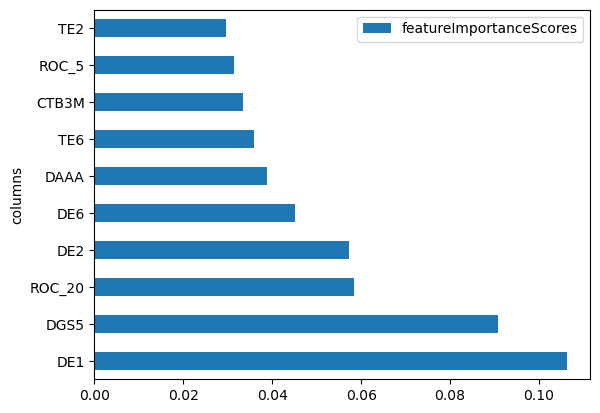

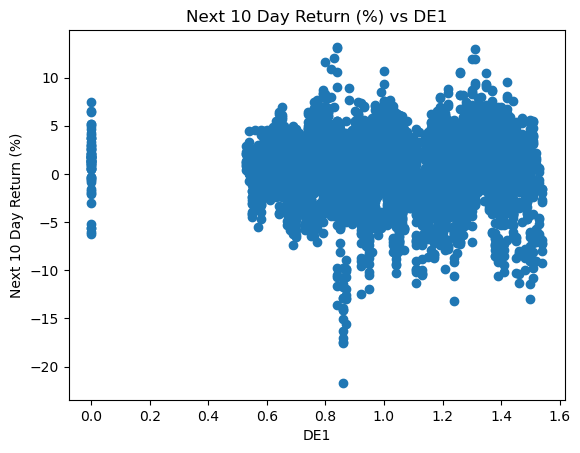

Spearman correlation for Next 10 day return vs DGS5 is r=-0.10516993798874119,p=1.1117911340165975e-25


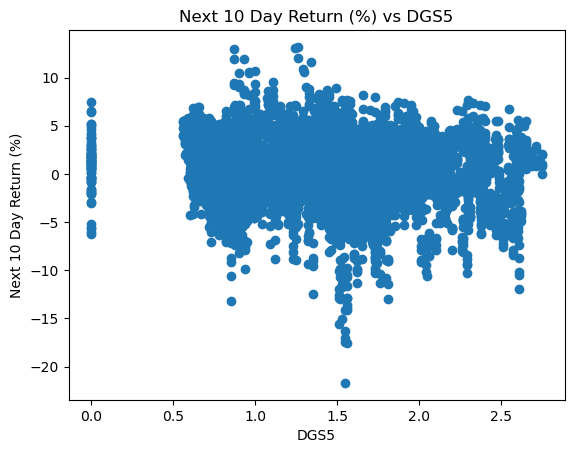

Spearman correlation for Next 10 day return vs ROC_20 is r=-0.09394568658998381,p=8.534773701374772e-21


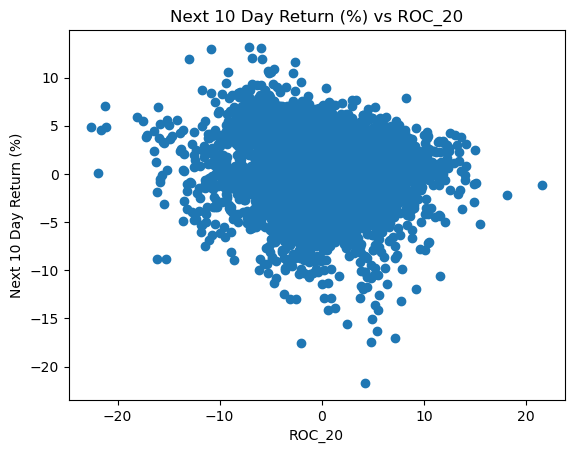

Spearman correlation for Next 10 day return vs DE2 is r=0.07892464178316387,p=4.0862990219594346e-15


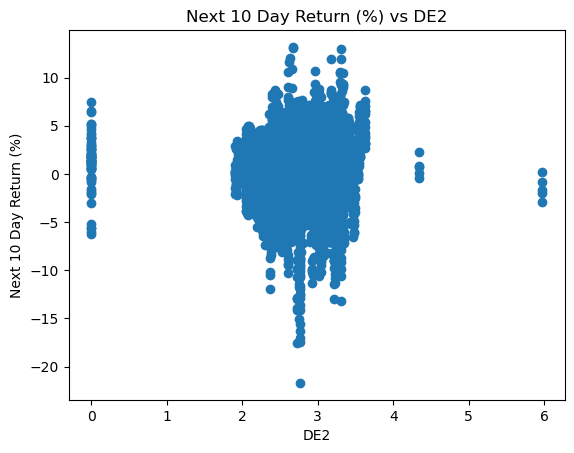

Spearman correlation for Next 10 day return vs DE6 is r=-0.023107813323596807,p=0.021691445805805756


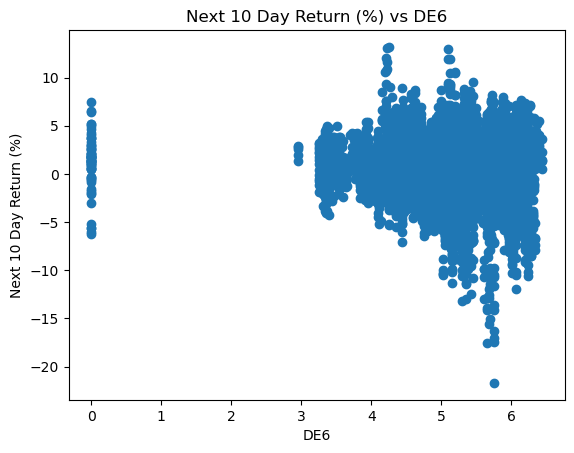

Spearman correlation for Next 10 day return vs DAAA is r=-0.05063540631239842,p=4.825824703269406e-07


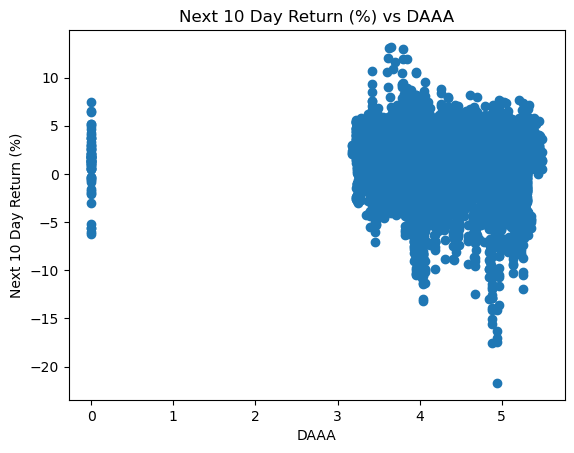

Spearman correlation for Next 10 day return vs TE6 is r=-0.06889945063803007,p=7.267677126516564e-12


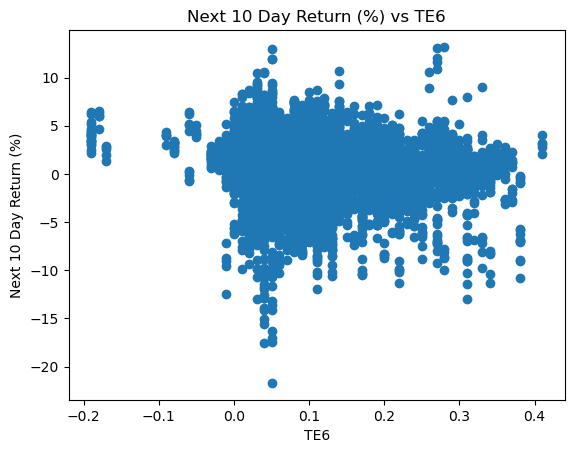

Spearman correlation for Next 10 day return vs CTB3M is r=-0.021012520601898805,p=0.03684157942758548


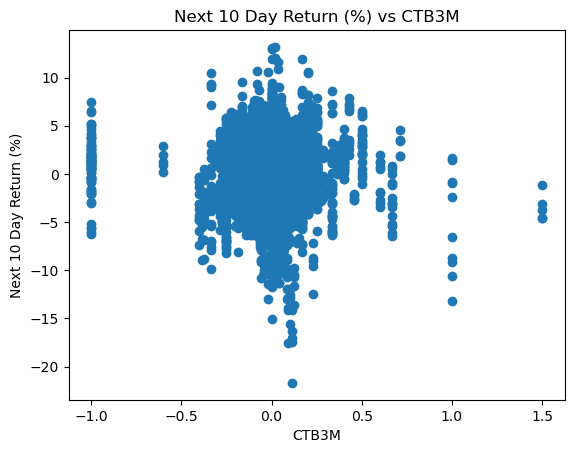

Spearman correlation for Next 10 day return vs ROC_5 is r=-0.048820245228690086,p=1.2193528789937006e-06


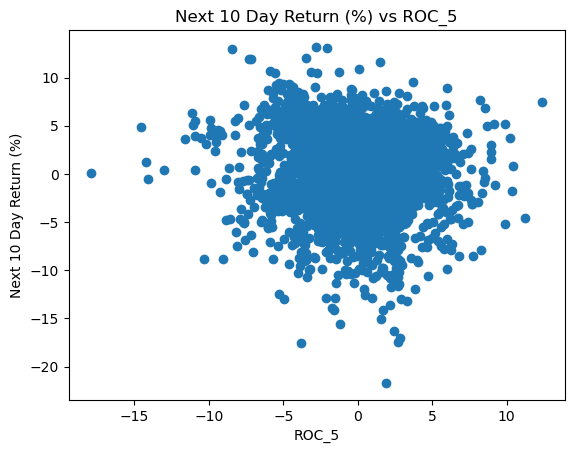

Spearman correlation for Next 10 day return vs TE2 is r=-0.07496091610526252,p=8.867813339915862e-14


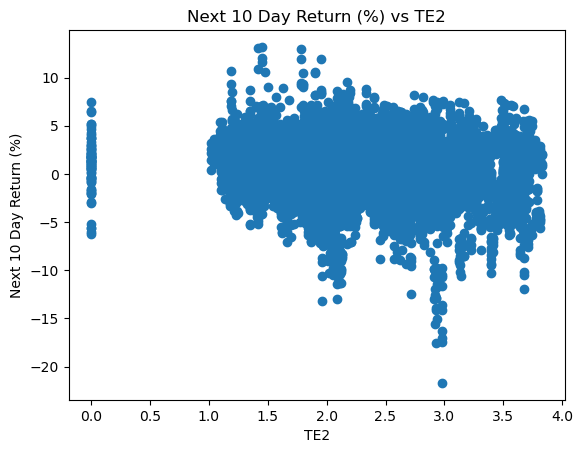

In [8]:
allData = allData.fillna(0)
y = allData["Next10DayReturn"]
X = allData.drop("Next10DayReturn",axis=1)
XTrain,XTest,yTrain,yTest = train_test_split(X,y,test_size=0.2,random_state=42)

significantColumns = util.retriveLowPValueColumns(X,y)
XTrain,XTest = XTrain[significantColumns],XTest[significantColumns]

modelGridSearch = util.getBestModel(XTrain,yTrain)

util.printMSE(modelGridSearch,XTrain,XTest,yTrain,yTest)

importanceDF = util.createImportanceDF(modelGridSearch.best_estimator_.feature_importances_,XTrain.columns)

print(importanceDF.head(10))
importanceDF.head(10).plot.barh(x="columns", y="featureImportanceScores", rot=0)
util.displayScatterOfTop10Features(allData,importanceDF,False)